<hr style="border:2px solid black"></hr>

# Deliverables

<hr style="border:2px solid black"></hr>

According to my analysis of the coffee house coupons (see below in Independent Investigation), the following is a description of the traits of someone most likely to accept a coupon:

1)  They will not be travelling to any urgent location.
2)  They will be travelling either alone, or with friends.
3)  They will be in their early-to-mid twenties, early thirties, or over 50.
4)  They will be either currently married or single (not partnered, widowed or divorced).
5)  They will not have children.
6)  They will have either some college (no degree), or a Bachelors degree.
7)  They will have an occupation of one of the following: Student, Unemployed, Computer & Mathematical, Sales & Related, Management, Education & Training & Library.
8)  They will have a salary between 12500  and 62499 dollars per year.
9)  They will go to a bar one or fewer times per month.
10) They will go to a coffee house eight or fewer times per month.
11) They will get carry-away 1 - 8 times per month.
12) They will go to cheap restaurants 1 - 8 times per month.
13) They will go to expensive restaurants three or fewer times per month.

<hr style="border:2px solid black"></hr>

# Prompt

<hr style="border:2px solid black"></hr>

# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





## Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
##====================================================================================================##
## Import Libraries and Functions:                                                                    ##
##====================================================================================================##

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

pd.options.mode.chained_assignment = None
from IPython.display import display
from pandas.testing import assert_frame_equal

##====================================================================================================##
## End: Import Libraries and Functions                                                                ##
##====================================================================================================##

<hr style="border:2px solid black"></hr>

## Problems

Use the prompts below to get started with your data analysis.  




<hr style="border:2px solid black"></hr>

### 1. Read in the `coupons.csv` file.

In [2]:
##====================================================================================================##
## Solution To Problem 1:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create a DataFrame from the information in the .csv file:                                          ##
##----------------------------------------------------------------------------------------------------##

data = pd.read_csv('data/coupons.csv')

##----------------------------------------------------------------------------------------------------##
## Display the DataFrame head():                                                                      ##
##----------------------------------------------------------------------------------------------------##

data.head()

##====================================================================================================##
## End: Solution To Problem 1                                                                         ##
##====================================================================================================##

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 2. Investigate the dataset for missing or problematic data.

In [3]:
##====================================================================================================##
## Solution To Problem 2:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Display the DataFrame info():                                                                      ##
##----------------------------------------------------------------------------------------------------##

print(data.info())

##----------------------------------------------------------------------------------------------------##
## Display the value_counts() of Column 'car':                                                        ##
##----------------------------------------------------------------------------------------------------##

print()
print(data["car"].value_counts())

print()

##----------------------------------------------------------------------------------------------------##
## Determine if the direction can be neither the same nor opposite (perpendicular?)                   ##
##----------------------------------------------------------------------------------------------------##

print(data.query("direction_same == 0 and direction_opp == 0").head())

##====================================================================================================##
## End: Solution To Problem 2                                                                         ##
##====================================================================================================##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### 3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
##====================================================================================================##
## Solution To Problem 3:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Drop the 'car' column from the DataFrame, combine the toCoupon* columns, combine the direction*    ##
## columns.                                                                                           ##
##----------------------------------------------------------------------------------------------------##

direction  = []

drive_time = []

for i in range(0, data.index.size):

    if (data["direction_same"][i] == 1): direction.append("same")

    else: direction.append("opposite")

    if (data["toCoupon_GEQ25min"][i] == 1): drive_time.append("> 25 min")

    elif (data["toCoupon_GEQ15min"][i] == 1): drive_time.append("15 - 25 min")

    else: drive_time.append("5 - 15 min")

data_cleaned = data.drop(["car", "direction_same", "direction_opp", "toCoupon_GEQ25min", 
                          "toCoupon_GEQ15min", "toCoupon_GEQ5min"], axis = 1)

data_cleaned["Direction"] = direction

data_cleaned["Drive Time"] = drive_time

##----------------------------------------------------------------------------------------------------##
## Replace any remaining missing values with 'unknown'                                                ##
##----------------------------------------------------------------------------------------------------##

data_cleaned.fillna('unknown', inplace = True)

##----------------------------------------------------------------------------------------------------##
## Display the cleaned DataFrame info():                                                              ##
##----------------------------------------------------------------------------------------------------##

print(data_cleaned.info())

data_cleaned.head()

##====================================================================================================##
## End: Solution To Problem 3                                                                         ##
##====================================================================================================##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,Direction,Drive Time
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,1,opposite,5 - 15 min
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0,opposite,5 - 15 min
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,1,opposite,15 - 25 min
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0,opposite,15 - 25 min
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0,opposite,15 - 25 min


### 4. What proportion of the total observations chose to accept the coupon? 

In [5]:
##====================================================================================================##
## Solution To Problem 4:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Compute the acceptance rate (number of yes values / total number of data points):                  ##
##----------------------------------------------------------------------------------------------------##

accepted = data_cleaned["Y"].sum() / data_cleaned["Y"].size

##----------------------------------------------------------------------------------------------------##
## Report the results:                                                                                ##
##----------------------------------------------------------------------------------------------------##

print("The proportion of accepted coupons is the total number of positive results (Y = 1) divided by \
the total number data points.\n\n")

print("Proportion of Respondents Who Accepted Coupon: " + str(np.round(accepted, 3)))

##====================================================================================================##
## End: Solution To Problem 4                                                                         ##
##====================================================================================================##

The proportion of accepted coupons is the total number of positive results (Y = 1) divided by the total number data points.


Proportion of Respondents Who Accepted Coupon: 0.568


### 5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Distribution of Coupon Types'}, xlabel='Coupon Type', ylabel='Count'>

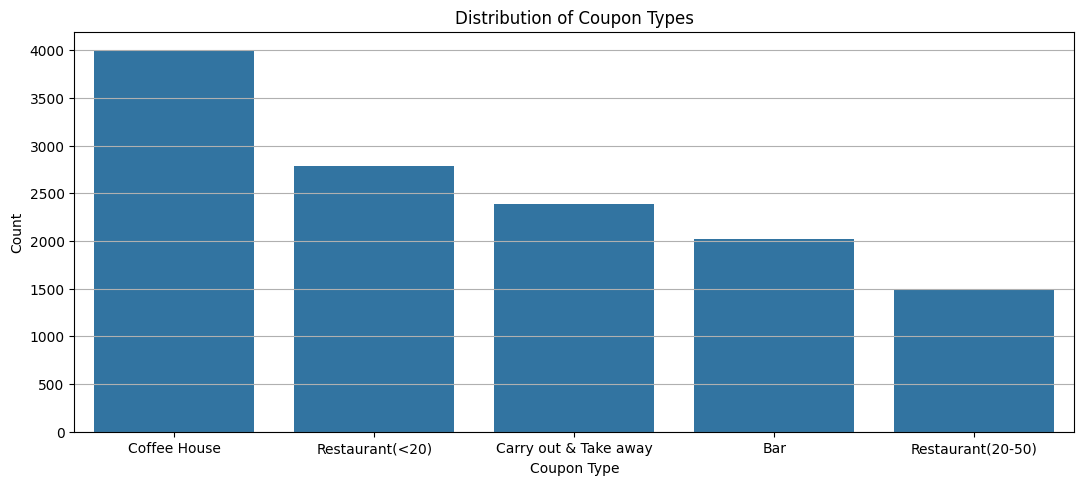

In [6]:
##====================================================================================================##
## Solution To Problem 5:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create a DataFrame containing the value_counts information from the 'coupon' column:               ##
##----------------------------------------------------------------------------------------------------##

coupon_df = pd.DataFrame(data_cleaned["coupon"].value_counts())

coupon_df.reset_index(inplace = True)

##----------------------------------------------------------------------------------------------------##
## Graph the DataFrame with coupon type along the x-axis and # of accepted coupons along the y-axis:  ##
##----------------------------------------------------------------------------------------------------##

fig = plt.figure(figsize = (10, 8))

graph_1 = fig.add_axes([ 0.0,  0.0, 1, 0.5])

graph_1.set_title('Distribution of Coupon Types')

graph_1.set_xlabel('Coupon Type')

graph_1.set_ylabel('Count')

graph_1.grid()

sns.barplot(x = coupon_df["coupon"], y = coupon_df["count"], ax = graph_1)

##====================================================================================================##
## End: Solution To Problem 5                                                                         ##
##====================================================================================================##

### 6. Use a histogram to visualize the temperature column.

<Axes: title={'center': 'Distribution of Temperatures (in Degrees Farenheit)'}, xlabel='Temperature', ylabel='Count'>

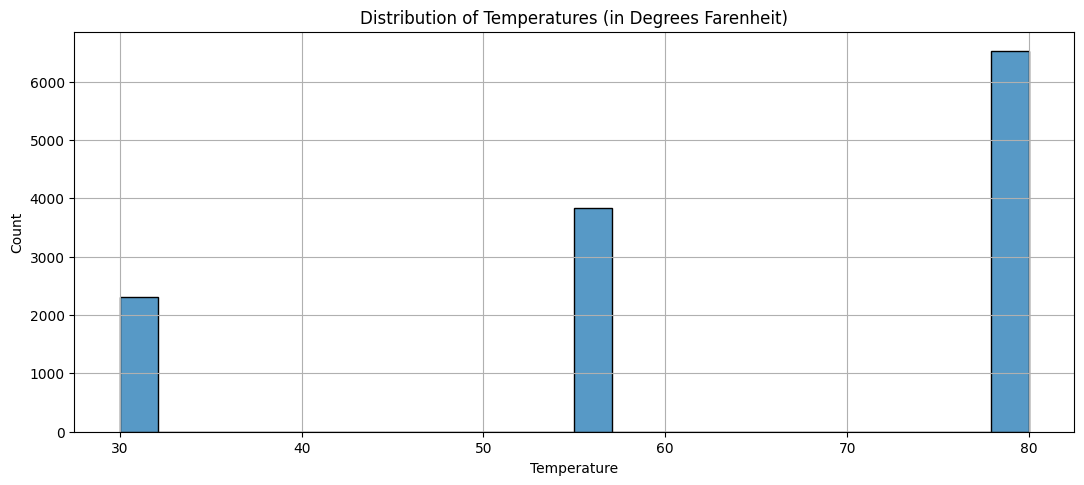

In [7]:
##====================================================================================================##
## Solution To Problem 6:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create a histogram of the values in the temperature column. Temperature values are displayed along ##
## the x-axis and Counts are displayed along the y-axis.                                              ##
##----------------------------------------------------------------------------------------------------##

fig = plt.figure(figsize = (10, 8))

graph_1 = fig.add_axes([ 0.0,  0.0, 1, 0.5])

graph_1.set_title('Distribution of Temperatures (in Degrees Farenheit)')

graph_1.set_xlabel('Temperature')

graph_1.set_ylabel('Count')

graph_1.grid()

sns.histplot(data_cleaned, x = "temperature", ax = graph_1)

##====================================================================================================##
## End: Solution To Problem 6                                                                         ##
##====================================================================================================##

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [8]:
##====================================================================================================##
## Solution To Problem 1:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Use the query function to select only rows that have 'Bar' in the coupon column.                   ##
##----------------------------------------------------------------------------------------------------##

bar_coupon_df = data_cleaned.query("coupon == 'Bar'")

bar_coupon_df.reset_index(inplace = True)

bar_coupon_df.drop('index', axis = 1, inplace = True)

bar_coupon_df.head()

##====================================================================================================##
## End: Solution To Problem 1                                                                         ##
##====================================================================================================##

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,Direction,Drive Time
0,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0,opposite,15 - 25 min
1,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,1,same,5 - 15 min
2,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0,opposite,> 25 min
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,opposite,5 - 15 min
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,same,5 - 15 min


### 2. What proportion of bar coupons were accepted?

In [9]:
##====================================================================================================##
## Solution To Problem 2:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## The proportion of accepted coupons is the total number of positive results (Y = 1) divided by the  ##
## total number data points.                                                                          ##
##----------------------------------------------------------------------------------------------------##

accepted = bar_coupon_df["Y"].sum() / bar_coupon_df["Y"].size

print("Proportion of respondents who accepted a coupon: " + str(np.round(accepted, 3)))

##====================================================================================================##
## End: Solution To Problem 2                                                                         ##
##====================================================================================================##

Proportion of respondents who accepted a coupon: 0.41


### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [10]:
##====================================================================================================##
## Function:    acceptance_rates                                                                      ##
##                                                                                                    ##
## DESCRIPTION: This function is used to compute categorical acceptance rates.                        ##
##                                                                                                    ##
## INPUT(S):    1) data_in:            DataFrame containing the full set of data                      ##
##              2) category_list:      List of data subsets to investigate                            ##
##              3) category_name_list: Names of data subsets to investigate                           ##
##              4) sort_bool:          If true, sort output DataFrame by acceptance rate              ##
##              5) threshold:          Fraction for threshold of respondents for category             ##
##                                                                                                    ##
## OUTPUT(S):   1) results:       DataFrame containing list of input categories and their acceptance  ##
##                                rates as well as the acceptance rate of the remainder of the full   ##
##                                input data set.                                                     ##
##====================================================================================================##

def acceptance_rates(data_df, category_list, category_name_list, sort_bool, threshold):

    ##------------------------------------------------------------------------------------------------##
    ## Create variable for naming categories based on position in category_list:                      ##
    ##------------------------------------------------------------------------------------------------##

    name = 1

    ##------------------------------------------------------------------------------------------------##
    ## Create lists to store values:                                                                  ##
    ##------------------------------------------------------------------------------------------------##

    category_indices_list = []
    acceptance_list       = []
    pop_frac_list         = []

    if (category_name_list == []): given_names = False

    else: given_names = True
    
    ##------------------------------------------------------------------------------------------------##
    ## Loop over categories in category_list:                                                         ##
    ##------------------------------------------------------------------------------------------------##

    for i in range(0, len(category_list)):
        
        ##--------------------------------------------------------------------------------------------##
        ## Get the indices of the current category:                                                   ##
        ##--------------------------------------------------------------------------------------------##

        category_indices_list += list(category_list[i].index)
        
        ##--------------------------------------------------------------------------------------------##
        ## Compute the acceptance rate for the current category:                                      ##
        ##--------------------------------------------------------------------------------------------##
        
        acceptance_list.append(np.round(category_list[i]["Y"].sum() / category_list[i]["Y"].size, 4))

        ##--------------------------------------------------------------------------------------------##
        ## Compute the population fraction for the current category:                                  ##
        ##--------------------------------------------------------------------------------------------##

        pop_frac_list.append(np.round(category_list[i]["Y"].size / data_df.index.size, 4))

        ##--------------------------------------------------------------------------------------------##
        ## Record the 'name' of the current category:                                                 ##
        ##--------------------------------------------------------------------------------------------##

        if (given_names == False):
            
            category_name_list.append("Category " + str(name))

            name += 1
        
    ##------------------------------------------------------------------------------------------------##
    ## Find the remaining indices (those not covered by the listed categories):                       ##
    ##------------------------------------------------------------------------------------------------##

    remainder_indices = list(set(data_df.index) - set(category_indices_list))

    ##------------------------------------------------------------------------------------------------##
    ## Get the remaining data entries (if any remain):                                                ##
    ##------------------------------------------------------------------------------------------------##
    
    if (given_names == False): category_name_list.append("Remainder")

    ##------------------------------------------------------------------------------------------------##
    ## If a remainder population exists, compute values:                                              ##
    ##------------------------------------------------------------------------------------------------##

    if (remainder_indices != []):

        remainder_series = pd.Series(remainder_indices)

        remainder = data_df.iloc[remainder_indices]

        ##--------------------------------------------------------------------------------------------##
        ## Compute the acceptance proportion of the remainder:                                        ##
        ##--------------------------------------------------------------------------------------------##

        acceptance_list.append(np.round(remainder["Y"].sum() / remainder["Y"].size, 4))

        ##--------------------------------------------------------------------------------------------##
        ## Compute the population fraction of the remainder:                                          ##
        ##--------------------------------------------------------------------------------------------##

        pop_frac_list.append(np.round(remainder["Y"].size / data_df.index.size, 4))

    ##------------------------------------------------------------------------------------------------##
    ## If no remainder population exists, drop 'Remainder' name from name list:                       ##
    ##------------------------------------------------------------------------------------------------##
    
    else:

        category_name_list.pop(-1)

    ##------------------------------------------------------------------------------------------------##
    ## If requested, sort the values:                                                                 ##
    ##------------------------------------------------------------------------------------------------##

    if (sort_bool == True):

        indices = np.argsort(acceptance_list)

        new_name_list = category_name_list.copy()
        pop_frac_copy = pop_frac_list.copy()

        for i in range(0, len(indices)):
            
            new_name_list[i] = category_name_list[indices[i]]
            
            pop_frac_copy[i] = pop_frac_list[indices[i]]

        category_name_list = new_name_list
        pop_frac_list = pop_frac_copy
        
        acceptance_list.sort()

    ##------------------------------------------------------------------------------------------------##
    ## Create a DataFrame of the results:                                                             ##
    ##------------------------------------------------------------------------------------------------##

    results = pd.DataFrame({"Category" : category_name_list, "Acceptance Rates" : acceptance_list})

    ##------------------------------------------------------------------------------------------------##
    ## Add the Weighted Acceptance Rates Column:                                                      ##
    ##------------------------------------------------------------------------------------------------##

    results["Population Fraction"] = pop_frac_list

    ##------------------------------------------------------------------------------------------------##
    ## Compute the acceptance times population fraction rates:                                        ##
    ##------------------------------------------------------------------------------------------------##

    results["Acceptance Rates x Population Fraction"] = \
    np.round(results["Acceptance Rates"] * results["Population Fraction"], 4)

    sum = results["Acceptance Rates x Population Fraction"].sum()

    ##------------------------------------------------------------------------------------------------##
    ## Find the list of categories needed to reach the threshold of respondents:                      ##
    ##------------------------------------------------------------------------------------------------##

    threshold_names  = results.sort_values("Acceptance Rates x Population Fraction", ascending = False)\
    ["Category"]

    threshold_values = results.sort_values("Acceptance Rates x Population Fraction", ascending = False)\
    ["Acceptance Rates x Population Fraction"]

    threshold_names_reindexed = list(threshold_names.reset_index()['Category'])
    threshold_values_reindexed = list(threshold_values.reset_index()\
                                     ['Acceptance Rates x Population Fraction'])

    threshold_list = ""
    fraction = 0

    for i in range(0, len(threshold_values)):

        threshold_list += str(threshold_names_reindexed[i]) + ", "

        fraction += threshold_values_reindexed[i]

        if (fraction >= threshold * sum): break

    print("Threshold Catagories: " + threshold_list)
    print()
    
    ##------------------------------------------------------------------------------------------------##
    ## Return the results:                                                                            ##
    ##------------------------------------------------------------------------------------------------##
    
    return results

##====================================================================================================##
## End Function: acceptance_rates                                                                     ##
##====================================================================================================##

In [11]:
##====================================================================================================##
## Function:    display_acceptance_rates                                                              ##
##                                                                                                    ##
## DESCRIPTION: This function is used to plot categorical acceptance rates.                           ##
##                                                                                                    ##
## INPUT(S):    1) data_in: DataFrame containing the full set of data                                 ##
##              2) title:   Title of the data                                                         ##
##              3) spacing: Distance between plots                                                    ##
##              4) angle:   Rotation angle of catagory labels                                         ##
##                                                                                                    ##
## OUTPUT(S):   None                                                                                  ##
##====================================================================================================##

def display_acceptance_rates(data_in, title, spacing, angle):

    ##------------------------------------------------------------------------------------------------##
    ## Print the title:                                                                               ##
    ##------------------------------------------------------------------------------------------------##

    print("\033[1m" + title + "\033[0m")

    ##------------------------------------------------------------------------------------------------##
    ## Display the DataFrame:                                                                         ##
    ##------------------------------------------------------------------------------------------------##

    display(data_in)
    
    ##------------------------------------------------------------------------------------------------##
    ## Graph the Categories on x-axis and values on y-axis:                                           ##
    ##------------------------------------------------------------------------------------------------##

    fig = plt.figure(figsize = (10, 8))

    h3 = 0.0
    h2 = h3 + 0.5 * spacing
    h1 = h2 + 0.5 * spacing

    graph_1 = fig.add_axes([0.0, h1, 1.0, 0.5], xlabel = None)
    graph_2 = fig.add_axes([0.0, h2, 1.0, 0.5])
    graph_3 = fig.add_axes([0.0, h3, 1.0, 0.5])

    graph_1.set_title('Acceptance Rates')
    graph_2.set_title('Population Fraction')
    graph_3.set_title('Acceptance Rates x Population Fraction')

    graph_1.set_xlabel(' ')
    graph_2.set_xlabel(' ')
    graph_3.set_xlabel(' ')

    graph_1.grid()
    graph_2.grid()
    graph_3.grid()

    graph_1.tick_params(axis='x', rotation = angle)
    graph_2.tick_params(axis='x', rotation = angle)
    graph_3.tick_params(axis='x', rotation = angle)

    graph_1_x = data_in.sort_values("Acceptance Rates")["Category"]
    graph_2_x = data_in.sort_values("Population Fraction")["Category"]
    graph_3_x = data_in.sort_values("Acceptance Rates x Population Fraction")["Category"]

    graph_1_y = data_in.sort_values("Acceptance Rates")["Acceptance Rates"]
    graph_2_y = data_in.sort_values("Population Fraction")["Population Fraction"]
    graph_3_y = data_in.sort_values("Acceptance Rates x Population Fraction")\
    ["Acceptance Rates x Population Fraction"]

    sns.barplot(x = graph_1_x, y = graph_1_y, ax = graph_1)
    sns.barplot(x = graph_2_x, y = graph_2_y, ax = graph_2)
    sns.barplot(x = graph_3_x, y = graph_3_y, ax = graph_3)

    plt.show()

##====================================================================================================##
## End Function: display_acceptance_rates                                                             ##
##====================================================================================================##

Actual Acceptance Rates


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Category 1,0.0000,0.2,0.0
1,Category 2,0.5000,0.2,0.1
2,Remainder,0.6667,0.6,0.4


Threshold Catagories: Remainder, 

Test Case 1


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Category 1,0.0000,0.2,0.0
1,Category 2,0.5000,0.2,0.1
2,Remainder,0.6667,0.6,0.4


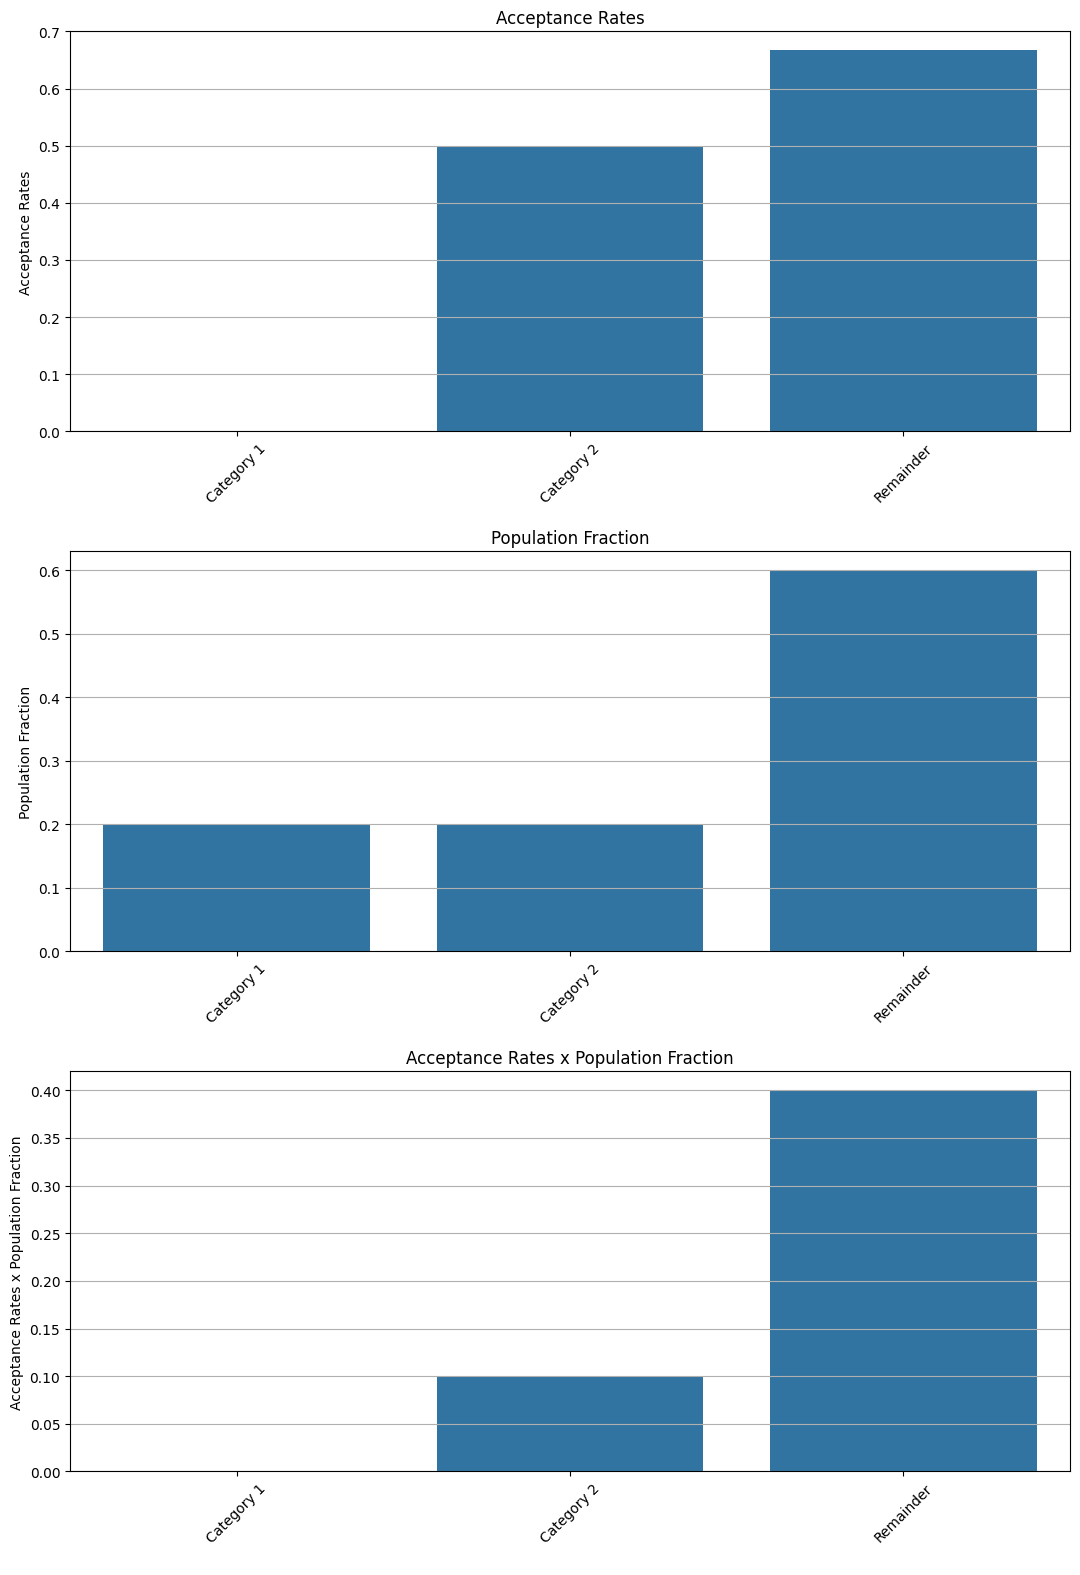

Test Case 1 Passed


In [12]:
##====================================================================================================##
## Function (acceptance_rates) Test Case 1:                                                           ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create the test data:                                                                              ##
##----------------------------------------------------------------------------------------------------##

data = pd.DataFrame({"Values" : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "Y" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]})

##----------------------------------------------------------------------------------------------------##
## Create the test categories:                                                                        ##
##----------------------------------------------------------------------------------------------------##

category_list = []

category_list.append(data.query("Values == 1 or Values == 3"))
category_list.append(data.query("Values == 5 or Values == 6"))

##----------------------------------------------------------------------------------------------------##
## Create a DataFrame containing the expected results:                                                ##
##----------------------------------------------------------------------------------------------------##

actual = pd.DataFrame({"Category" : ["Category 1", "Category 2", "Remainder"], \
                       "Acceptance Rates" : [0.0, 0.50, 0.6667], \
                       "Population Fraction" : [0.2, 0.2, 0.6], \
                       "Acceptance Rates x Population Fraction" : [0.0, 0.1, 0.4]})

print("Actual Acceptance Rates")

display(actual)

##----------------------------------------------------------------------------------------------------##
## Test the function:                                                                                 ##
##----------------------------------------------------------------------------------------------------##

test = acceptance_rates(data, category_list, [], True, 0.6)

display_acceptance_rates(test, "Test Case 1", 1.3, 45)

try:
    
    assert_frame_equal(actual, test)

except:

    print("Test Case 1 Failed")

else:

    print("Test Case 1 Passed")

##====================================================================================================##
## End: Function (acceptance_rates) Test Case 1                                                       ##
##====================================================================================================##

Actual Acceptance Rates


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Name 1,0.0000,0.2,0.0
1,Name 5,0.0000,0.1,0.0
2,Name 2,0.5000,0.2,0.1
3,Name 4,0.6667,0.3,0.2
4,Name 3,1.0000,0.2,0.2


Threshold Catagories: Name 4, Name 3, 

Test Case 2


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Name 1,0.0000,0.2,0.0
1,Name 5,0.0000,0.1,0.0
2,Name 2,0.5000,0.2,0.1
3,Name 4,0.6667,0.3,0.2
4,Name 3,1.0000,0.2,0.2


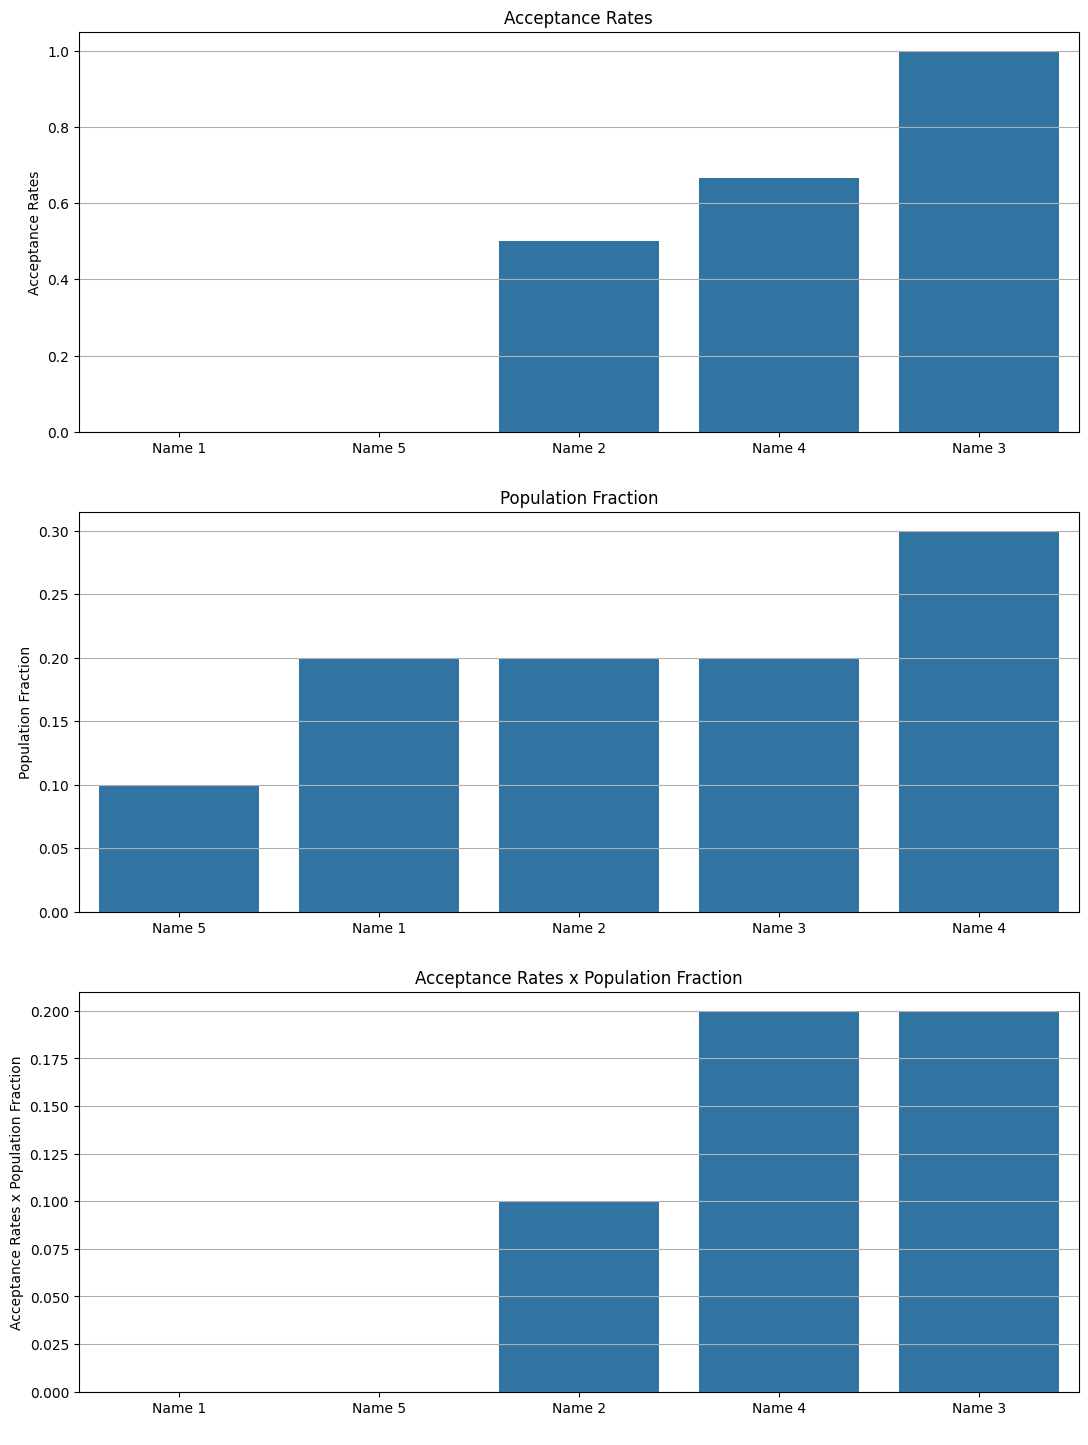

Test Case 2 Passed


In [13]:
##====================================================================================================##
## Function (acceptance_rates) Test Case 2                                                            ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create the test data:                                                                              ##
##----------------------------------------------------------------------------------------------------##

data = pd.DataFrame({"Values" : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "Y" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]})

##----------------------------------------------------------------------------------------------------##
## Create the test categories:                                                                        ##
##----------------------------------------------------------------------------------------------------##

category_list = []

category_list.append(data.query("Values == 1 or Values == 3"))
category_list.append(data.query("Values == 5 or Values == 6"))
category_list.append(data.query("Values == 4 or Values == 8"))
category_list.append(data.query("Values == 0 or Values == 2 or Values == 7"))
category_list.append(data.query("Values == 9"))

name_list = ["Name 1", "Name 2", "Name 3", "Name 4", "Name 5", "Remainder"]

##----------------------------------------------------------------------------------------------------##
## Create a DataFrame containing the expected results:                                                ##
##----------------------------------------------------------------------------------------------------##

actual = pd.DataFrame({"Category" : ["Name 1", "Name 5", "Name 2", "Name 4", "Name 3"], \
                       "Acceptance Rates" : [0.00, 0.00, 0.50, 0.6667, 1.00], \
                       "Population Fraction" : [0.2, 0.1, 0.2, 0.3, 0.2], \
                       "Acceptance Rates x Population Fraction" : [0.0, 0.0, 0.1, 0.2, 0.2]})

print("Actual Acceptance Rates")

display(actual)

##----------------------------------------------------------------------------------------------------##
## Test the function:                                                                                 ##
##----------------------------------------------------------------------------------------------------##

test = acceptance_rates(data, category_list, name_list, True, 0.6)

display_acceptance_rates(test, "Test Case 2", 1.2, 0)

try:
    
    assert_frame_equal(actual, test)

except:

    print("Test Case 2 Failed")

else:

    print("Test Case 2 Passed")

##====================================================================================================##
## End: Function (acceptance_rates) Test Case 2                                                       ##
##====================================================================================================##

Threshold Catagories: Category 1, 

Category 1 is drivers who went to bars three or fewer times in a month.

Remainder is drivers who went to bars more than three times in a month.

Problem 3


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Category 1,0.3706,0.8909,0.3302
1,Remainder,0.7318,0.1091,0.0798


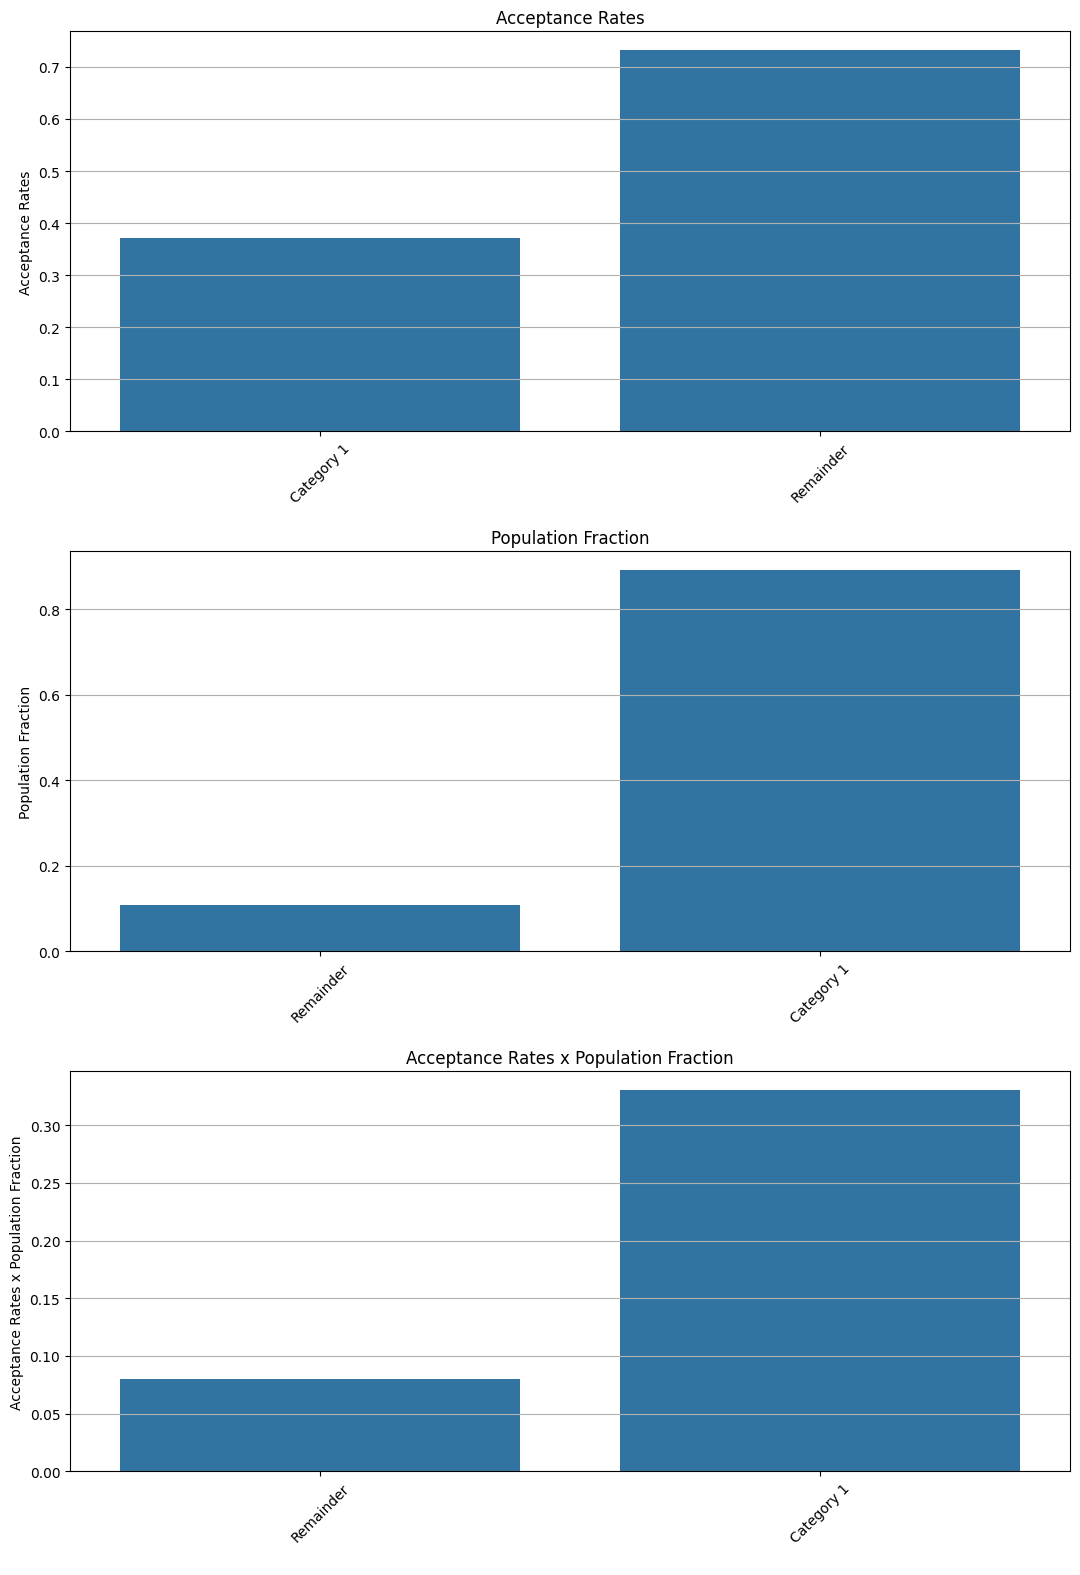

In [14]:
##====================================================================================================##
## Solution To Problem 3:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create the categories to evaluate:                                                                 ##
##----------------------------------------------------------------------------------------------------##

category_list = []

category_list.append(bar_coupon_df.query("Bar == 'never' or Bar == 'less1' or Bar == '1~3'"))

##----------------------------------------------------------------------------------------------------##
## Get the acceptance rates for the categories and remainder:                                         ##
##----------------------------------------------------------------------------------------------------##

results = acceptance_rates(bar_coupon_df, category_list, [], True, 0.6)

##----------------------------------------------------------------------------------------------------##
## Display the results:                                                                               ##
##----------------------------------------------------------------------------------------------------##

print("Category 1 is drivers who went to bars three or fewer times in a month.\n")
print("Remainder is drivers who went to bars more than three times in a month.\n")

display_acceptance_rates(results, "Problem 3", 1.3, 45)

##====================================================================================================##
## End: Solution To Problem 3                                                                         ##
##====================================================================================================##

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Threshold Catagories: Remainder, 

Category 1 is drivers who went to bars more than once a month and over 25 years of age.

Remainder is all other drivers.

Problem 4


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Remainder,0.3350,0.7918,0.2653
1,Category 1,0.6952,0.2082,0.1447


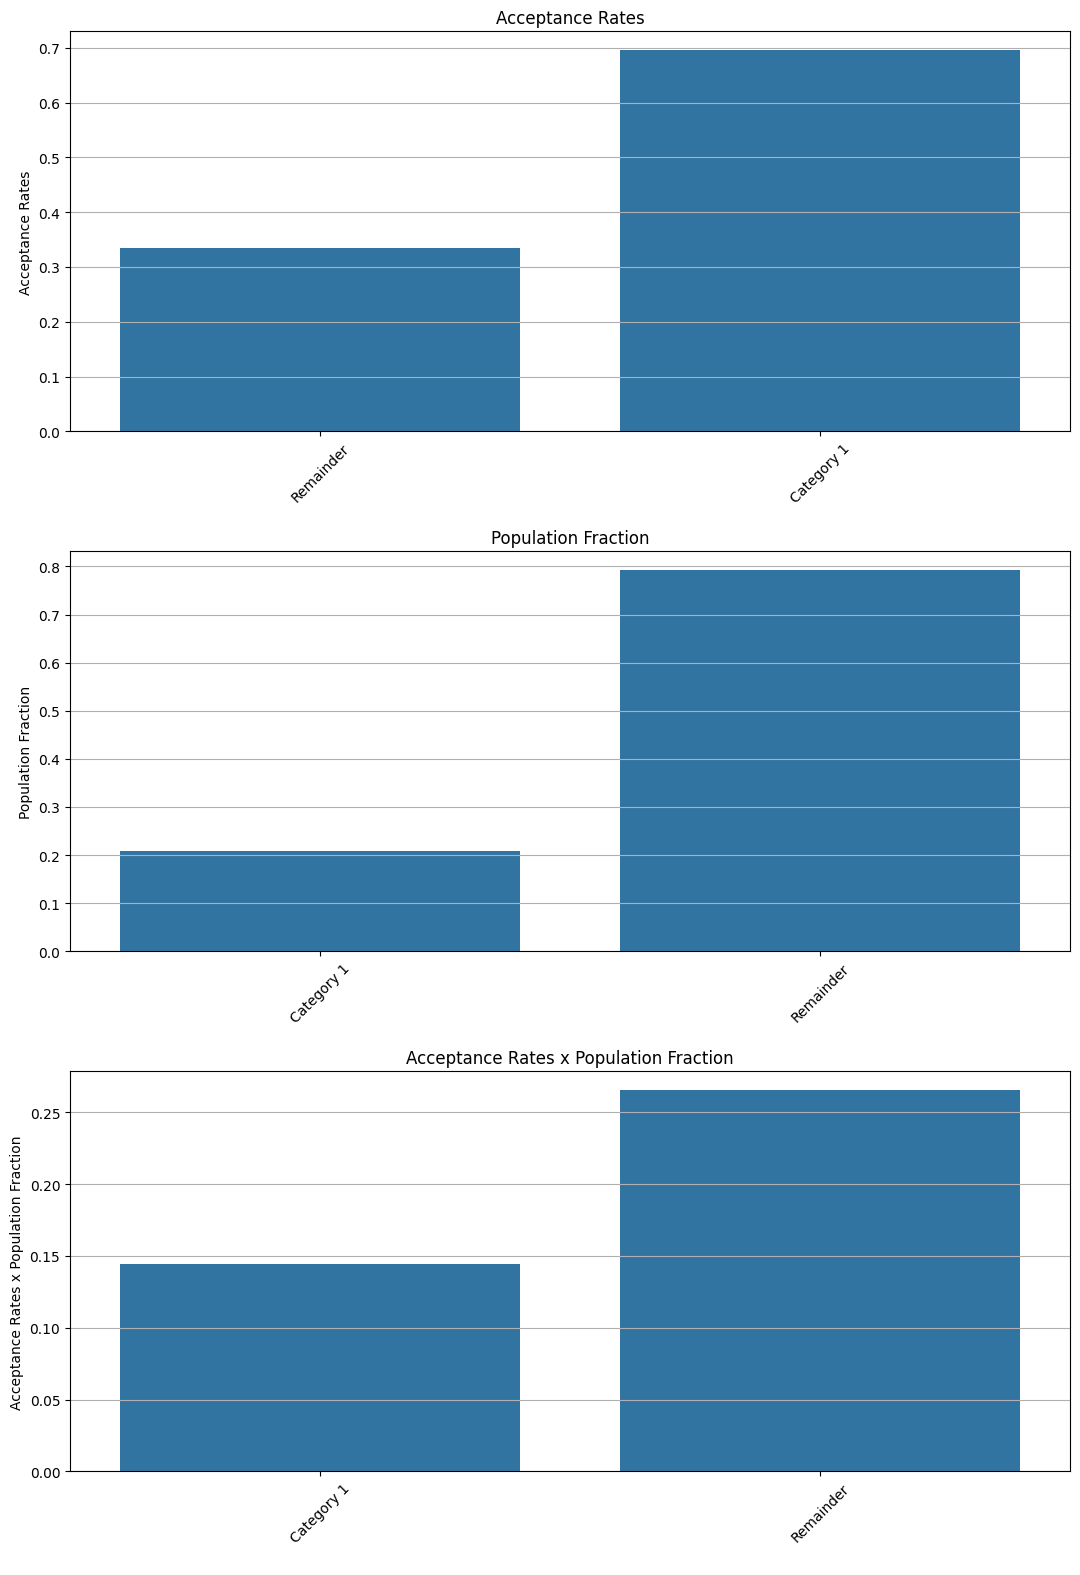

In [15]:
##====================================================================================================##
## Solution To Problem 4:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Convert the age column to numeric values:                                                          ##
##----------------------------------------------------------------------------------------------------##

bar_coupon_df["age"].replace({"50plus" : 51, "below21" : 20}, inplace = True)

bar_coupon_df["age"] = pd.to_numeric(bar_coupon_df["age"])

##----------------------------------------------------------------------------------------------------##
## Create the categories to evaluate:                                                                 ##
##----------------------------------------------------------------------------------------------------##

category_list = []

category_list.append(bar_coupon_df.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and age > 25"))

##----------------------------------------------------------------------------------------------------##
## Get the acceptance rates for the categories and remainder:                                         ##
##----------------------------------------------------------------------------------------------------##

results = acceptance_rates(bar_coupon_df, category_list, [], True, 0.6)

##----------------------------------------------------------------------------------------------------##
## Display the results:                                                                               ##
##----------------------------------------------------------------------------------------------------##

print("Category 1 is drivers who went to bars more than once a month and over 25 years of age.\n")
print("Remainder is all other drivers.\n")

display_acceptance_rates(results, "Problem 4", 1.3, 45)

##====================================================================================================##
## End: Solution To Problem 4                                                                         ##
##====================================================================================================##

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

Threshold Catagories: Remainder, 

Category 1 is drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

Remainder is all other drivers.

Problem 5


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Remainder,0.3771,0.9033,0.3406
1,Category 1,0.7179,0.0967,0.0694


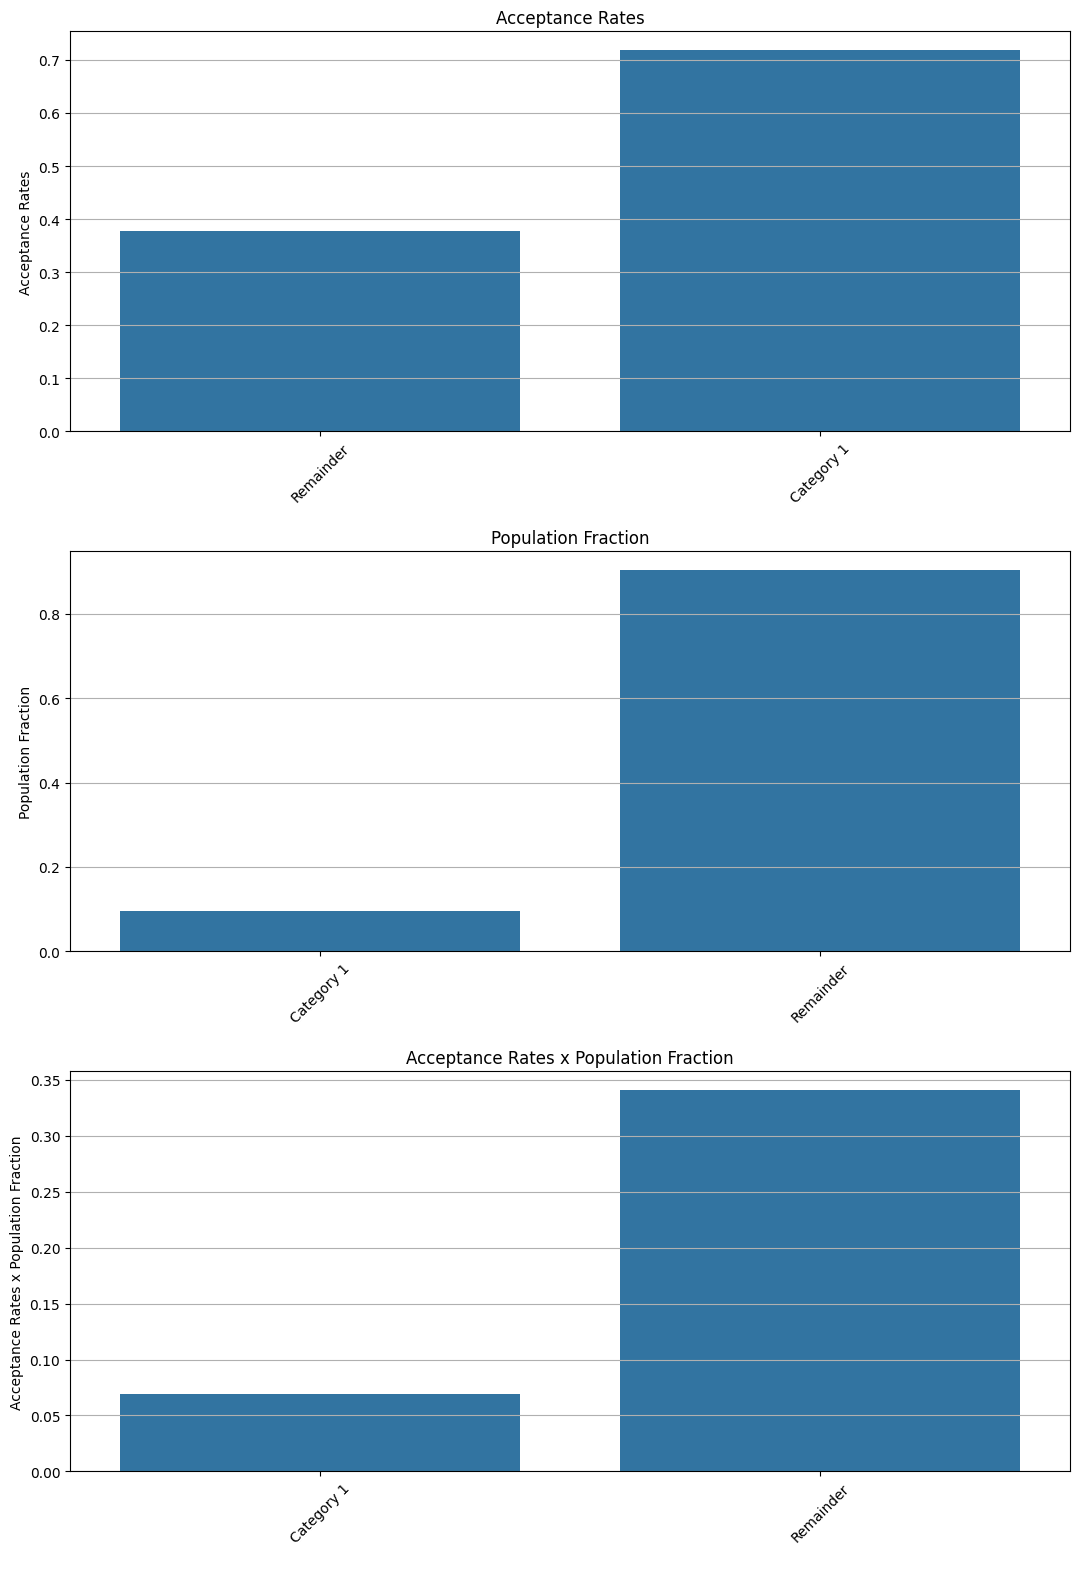

In [16]:
##====================================================================================================##
## Solution To Problem 5:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create the categories to evaluate:                                                                 ##
##----------------------------------------------------------------------------------------------------##

category_list = []

category_list.append(bar_coupon_df.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and \
passanger != 'Kid(s)' and passanger != 'Alone' and occupation != 'farming' and occupation != 'fishing' \
and occupation != 'forestry'"))

##----------------------------------------------------------------------------------------------------##
## Get the acceptance rates for the categories and remainder:                                         ##
##----------------------------------------------------------------------------------------------------##

results = acceptance_rates(bar_coupon_df, category_list, [], True, 0.6)

##----------------------------------------------------------------------------------------------------##
## Display the results:                                                                               ##
##----------------------------------------------------------------------------------------------------##

print("Category 1 is drivers who go to bars more than once a month and had passengers that were not a \
kid and had occupations other than farming, fishing, or forestry.\n")

print("Remainder is all other drivers.\n")

display_acceptance_rates(results, "Problem 5", 1.3, 45)

##====================================================================================================##
## End: Solution To Problem 5                                                                         ##
##====================================================================================================##

### 6. Compare the acceptance rates between those drivers who:

### - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
### - go to bars more than once a month and are under the age of 30 *OR*
### - go to cheap restaurants more than 4 times a month and income is less than 50K. 

Threshold Catagories: Category 2, Remainder, 

Category 1 is drivers who go to bars more than once a month and had passengers that were not a kid and were not widowed.

Category 2 is drivers who go to bars more than once a month and are under the age of 30.

Category 3 is drivers who go to cheap restaurants more than 4 times a month and whose income is less than 50K.

Remainder is all other drivers.

Problem 6


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Remainder,0.3002,0.6539,0.1963
1,Category 3,0.4709,0.0853,0.0402
2,Category 2,0.6918,0.2895,0.2003
3,Category 1,0.7179,0.0967,0.0694


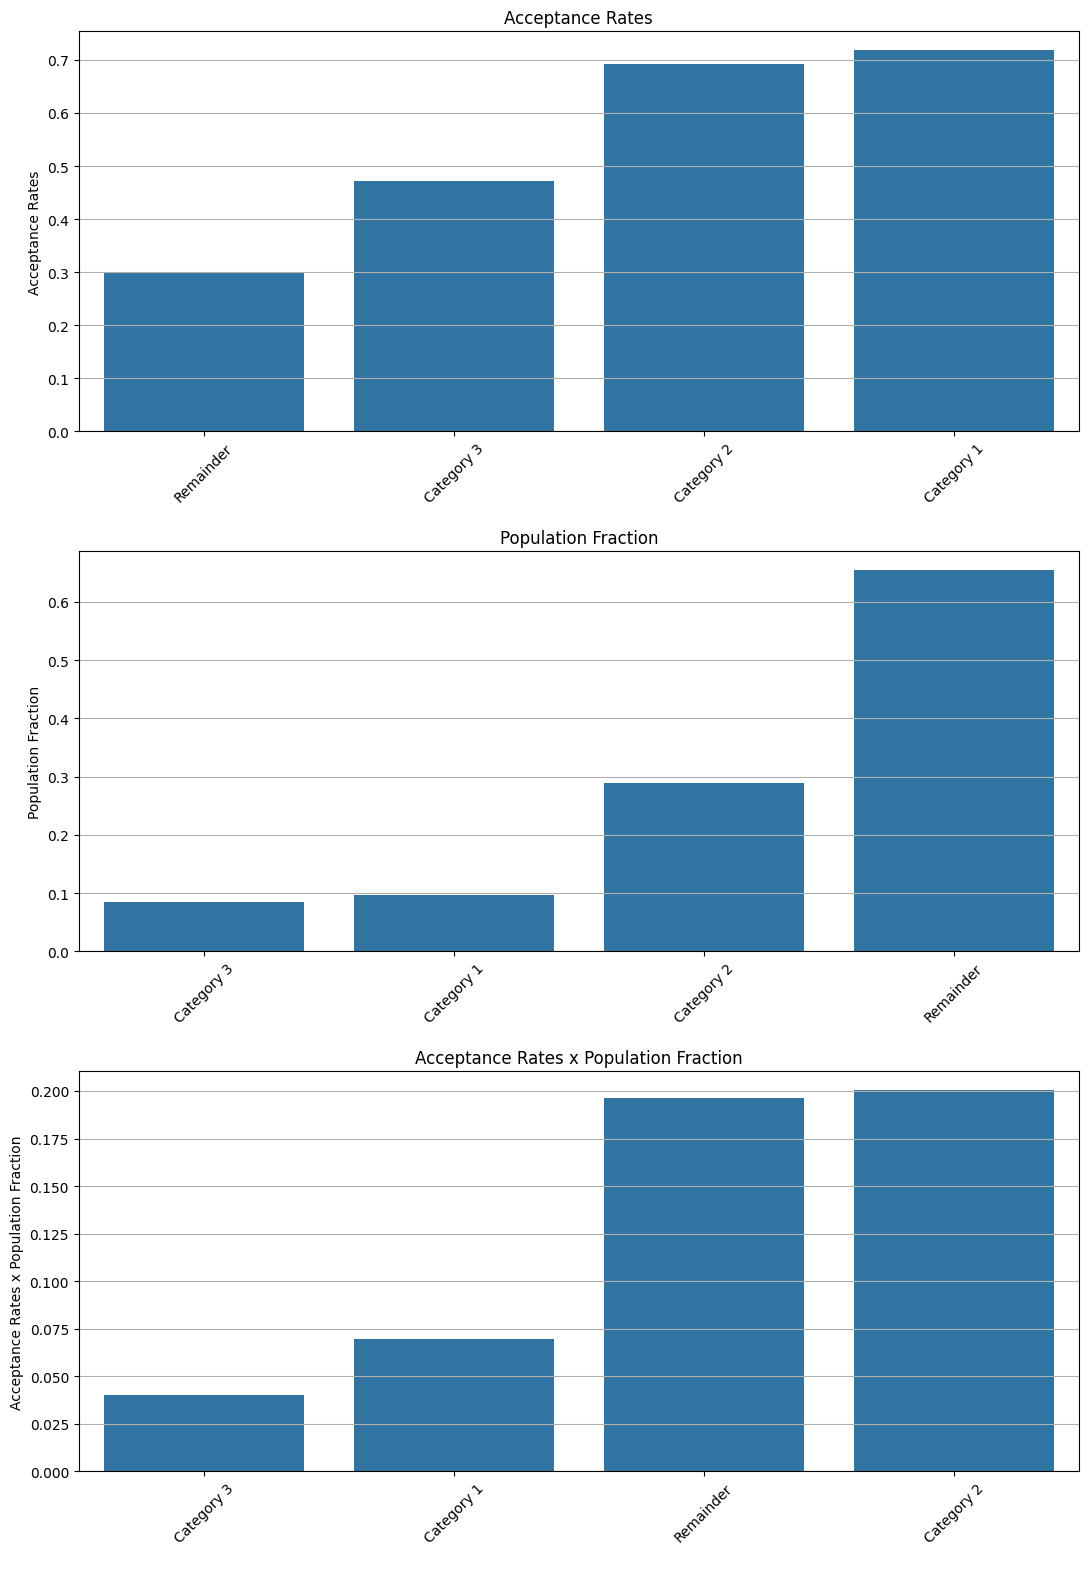

In [17]:
##====================================================================================================##
## Solution To Problem 6:                                                                             ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create the categories to evaluate:                                                                 ##
##----------------------------------------------------------------------------------------------------##

category_list = []

category_list.append(bar_coupon_df.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and \
passanger != 'Kid(s)' and passanger != 'Alone' and maritalStatus != 'Widowed'"))

category_list.append(bar_coupon_df.query("Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' and age < 30"))

category_list.append(bar_coupon_df.query("(RestaurantLessThan20 == '4~8' or \
RestaurantLessThan20 == 'gt8') and (income == '$25000 - $37499' or income == '$37500 - $49999')"))

##----------------------------------------------------------------------------------------------------##
## Get the acceptance rates for the categories and remainder:                                         ##
##----------------------------------------------------------------------------------------------------##

results = acceptance_rates(bar_coupon_df, category_list, [], True, 0.6)

##----------------------------------------------------------------------------------------------------##
## Display the results:                                                                               ##
##----------------------------------------------------------------------------------------------------##

print("Category 1 is drivers who go to bars more than once a month and had passengers that were not a \
kid and were not widowed.\n")

print("Category 2 is drivers who go to bars more than once a month and are under the age of 30.\n")

print("Category 3 is drivers who go to cheap restaurants more than 4 times a month and whose income \
is less than 50K.\n")

print("Remainder is all other drivers.\n")

display_acceptance_rates(results, "Problem 6", 1.3, 45)

##====================================================================================================##
## End: Solution To Problem 6                                                                         ##
##====================================================================================================##

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The most important factors for accepting coupons seem to be age and bar visitation frequency.
Drivers most likely to accept coupons are:

1) under the age of 30
2) frequent bar visitors

<hr style="border:2px solid black"></hr>

# Independent Investigation

<hr style="border:2px solid black"></hr>



Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Results

### Data Description

I chose to use the 'Coffee House' coupons subset of the data. I dropped out systematic variables that seemed to have more to do with the conditions of the survey.
These include: (weather, temperature, time, direction, and drive time). I analyzed the (hopefully) random variables of the respondants. I measured the acceptance
rates, the population fractions, and the product of acceptance rates with population fractions to see the efficacy of the coupons handed out. To find the most
signifigant categories, I summed the categories product values and used a threshold of 60% of the total for each columns values. Thus the listed categories represent
60% of accepted coupons for that dimension of the data.

Based on my results, the coupons should be tailored towards the following customers:

1)  Customers without a defined destination
2)  Customers who are alone or with friend groups
3)  Customers who are seniors or are in their late 20s to early 30s
4)  Customers who are single, or married with a partner
5)  Customers who do not have children
6)  Customers who have "some college education" or a completed Bachelors degree
7)  Customers who are students, unemployed, or work in Computer & Mathematical, Sales & Related, Management, Education, Training, Library 
8)  Customers who make between 12500 and 62499 dollars in salary
9)  Customers who infrequently (once per month or less) visit a bar
10) Customers who moderately or infrequently (up to 8 times per month) visit a coffee house
11) Customers who moderately (1 - 8 times per month) get carry away food
12) Customers who moderately (1 - 8 times per month) visit cheap restaurants
13) Customers who infrequently (3 times or less per month) visit expensive restaurants

## Analysis

### For this analysis, I used the 'Coffee House' coupons.

In [18]:
##====================================================================================================##
## Step 1 (Create DataFrame)                                                                          ##
##====================================================================================================##

##----------------------------------------------------------------------------------------------------##
## Create a DataFrame with only the 'Coffee House' coupons.                                           ##
##----------------------------------------------------------------------------------------------------##

coffee_df = data_cleaned.query("coupon == 'Coffee House'").drop("coupon", axis = 1)

##----------------------------------------------------------------------------------------------------##
## Reset the index for the new DataFrame:                                                             ##
##----------------------------------------------------------------------------------------------------##

coffee_df.reset_index(inplace = True)

coffee_df.drop('index', axis = 1, inplace = True)

##----------------------------------------------------------------------------------------------------##
## Remove systematic variables:                                                                       ##
##----------------------------------------------------------------------------------------------------##

systematic_list = ['weather', 'temperature', 'time', 'Direction', 'Drive Time']

coffee_df.drop(systematic_list, axis = 1, inplace = True)

##----------------------------------------------------------------------------------------------------##
## Display the new DataFrame head:                                                                    ##
##----------------------------------------------------------------------------------------------------##

display(coffee_df)

##====================================================================================================##
## End: Step 1 (Create DataFrame)                                                                     ##
##====================================================================================================##

,destination,passanger,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y
0,No Urgent Place,Friend(s),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0
1,No Urgent Place,Friend(s),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0
2,No Urgent Place,Friend(s),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0
3,No Urgent Place,Kid(s),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,1
4,Home,Alone,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,Home,Alone,2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,0
3992,Work,Alone,1d,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,0
3993,Home,Alone,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0
3994,Home,Alone,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0


### Create New Function For Finding Acceptance Rates of the DataFrame Columns

In [19]:
##====================================================================================================##
## Function:    dataframe_acceptance_rates                                                            ##
##                                                                                                    ##
## DESCRIPTION: This function is used to get acceptance rates for columns in a DataFrame.             ##
##                                                                                                    ##
## INPUT(S):    1) data_df: DataFrame containing the full set of data                                 ##
##                                                                                                    ##
## OUTPUT(S):   None                                                                                  ##
##====================================================================================================##

def dataframe_acceptance_rates(data_df):

    ##------------------------------------------------------------------------------------------------##
    ## Prepare the data:                                                                              ##
    ##------------------------------------------------------------------------------------------------##

    column_list = list(data_df.drop("Y", axis = 1).columns)

    ##------------------------------------------------------------------------------------------------##
    ## Loop over columns:                                                                             ##
    ##------------------------------------------------------------------------------------------------##

    for column in column_list:

        ##--------------------------------------------------------------------------------------------##
        ## Get categories from column value counts:                                                   ##
        ##--------------------------------------------------------------------------------------------##

        values = pd.DataFrame(data_df[column].value_counts())

        values.reset_index(inplace = True)

        name_list = list(values[column])

        category_list = []

        for name in name_list:
            category_list.append(data_df.query("`{0}` == @name".format(column)))

        name_list.append("Remainder")

        ##--------------------------------------------------------------------------------------------##
        ## Get category acceptance rates:                                                             ##
        ##--------------------------------------------------------------------------------------------##

        results = acceptance_rates(data_df, category_list, name_list, True, 0.6)

        ##--------------------------------------------------------------------------------------------##
        ## Display category acceptance rates:                                                         ##
        ##--------------------------------------------------------------------------------------------##

        spacing = 1.2
        angle   = 0
        
        if (column == 'education'):

            spacing = 1.65
            angle   = 45

        if (column == 'occupation'):

            spacing = 1.9
            angle   = 90

        if (column == 'income'):

            spacing = 1.4
            angle   = 45

        display_acceptance_rates(results, column, spacing, angle)

        for i in range(0, 5): print()

##====================================================================================================##
## End Function: dataframe_acceptance_rates                                                           ##
##====================================================================================================##

Threshold Catagories: No Urgent Place, 

destination


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Home,0.3621,0.2322,0.0841
1,Work,0.4458,0.2285,0.1019
2,No Urgent Place,0.5810,0.5393,0.3133


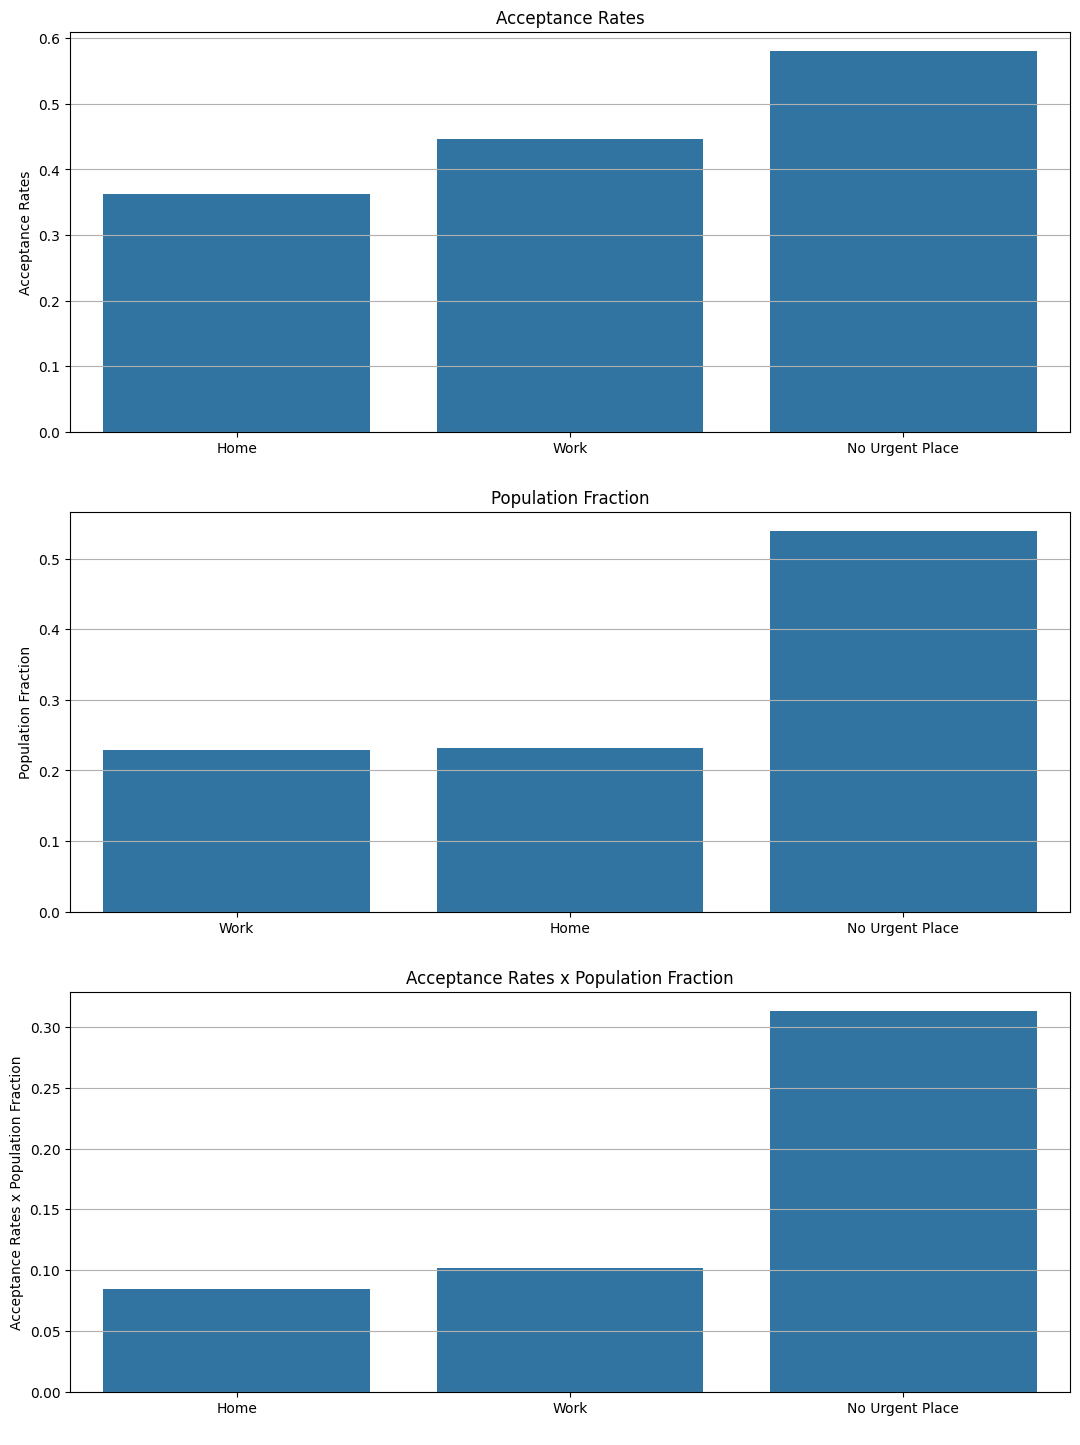






Threshold Catagories: Alone, Friend(s), 

passanger


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Alone,0.4379,0.5646,0.2472
1,Kid(s),0.4831,0.0518,0.0250
2,Partner,0.5705,0.0763,0.0435
3,Friend(s),0.5969,0.3073,0.1834


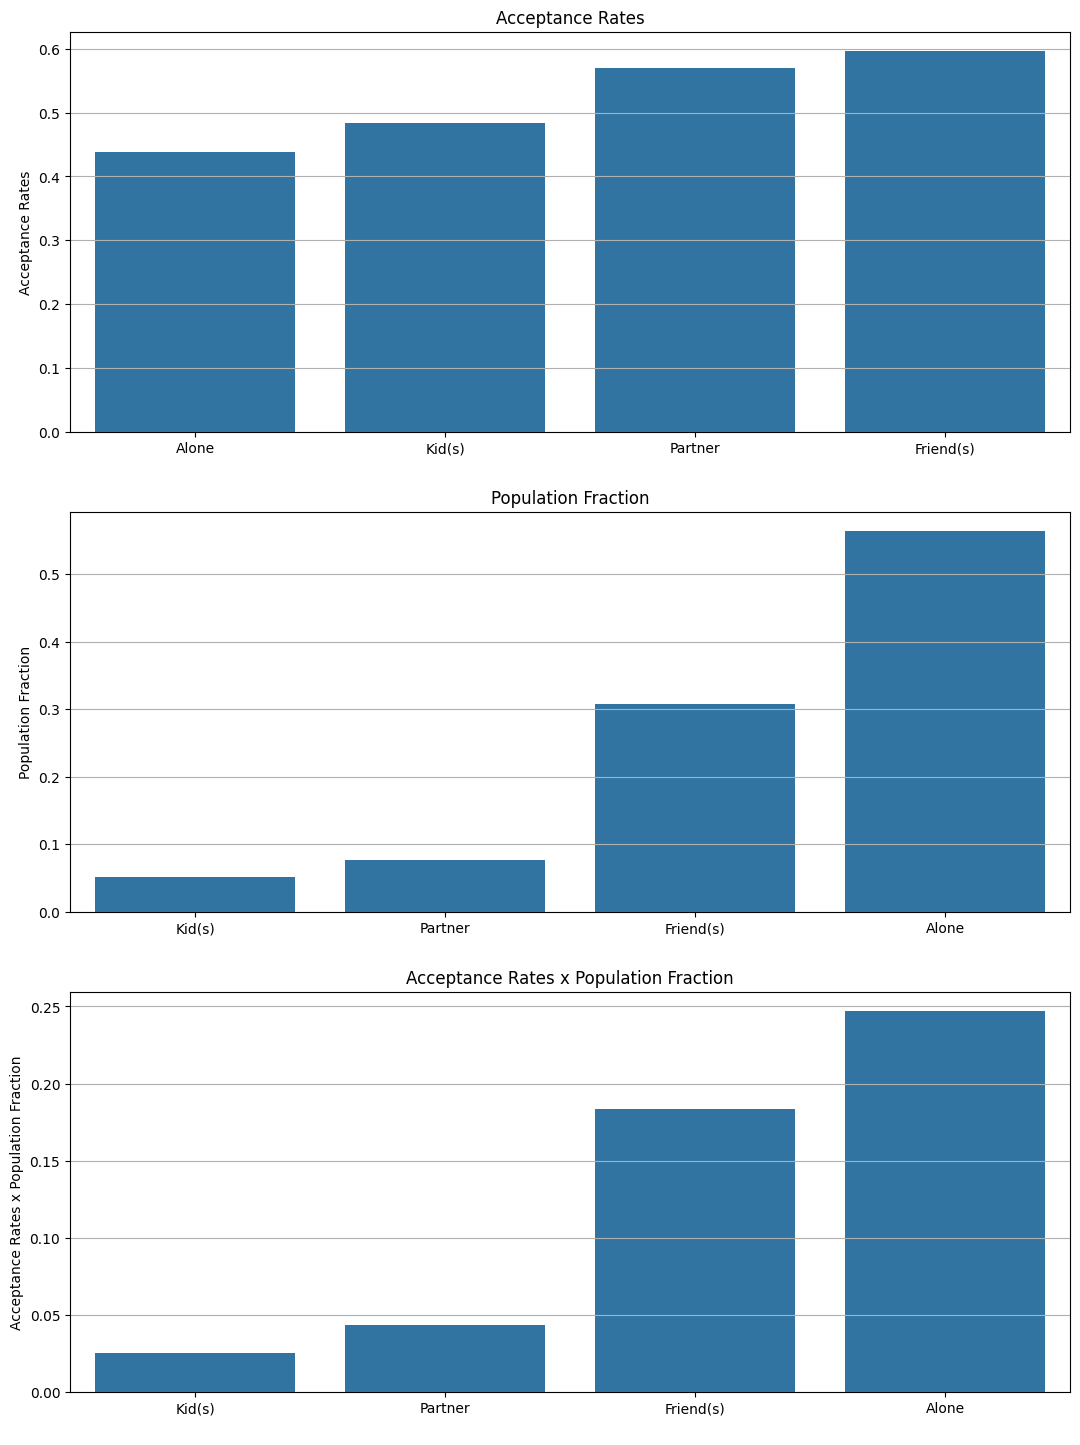






Threshold Catagories: 1d, 2h, 

expiration


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,2h,0.4320,0.5573,0.2408
1,1d,0.5839,0.4427,0.2585


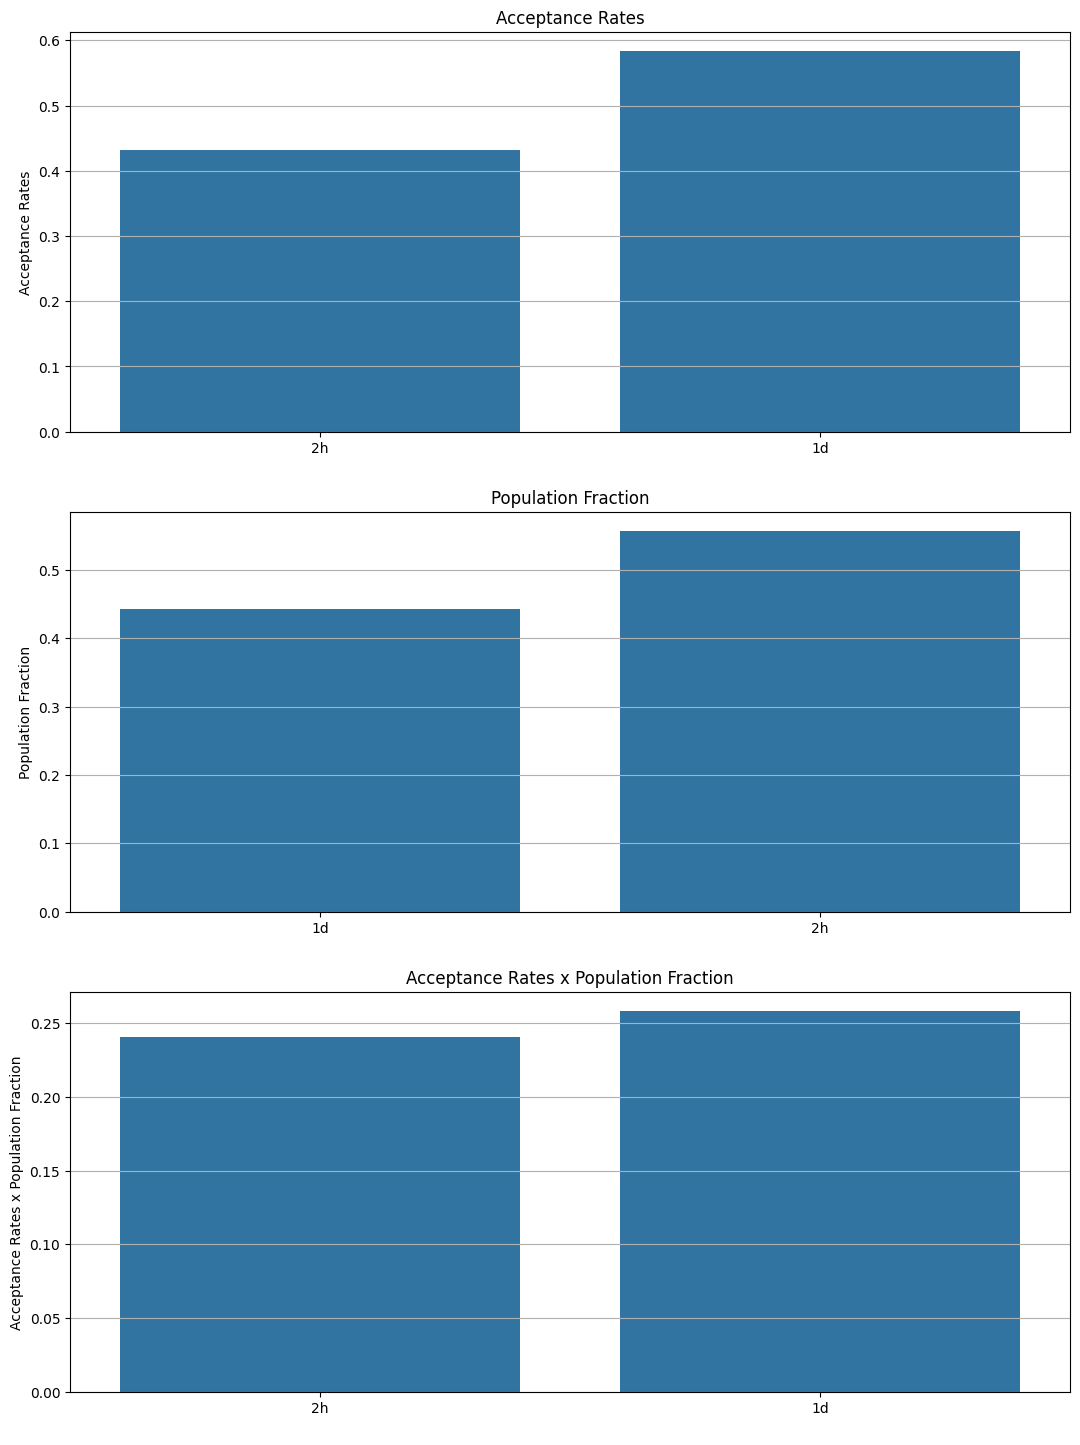






Threshold Catagories: Female, Male, 

gender


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Female,0.4924,0.5133,0.2527
1,Male,0.5064,0.4867,0.2465


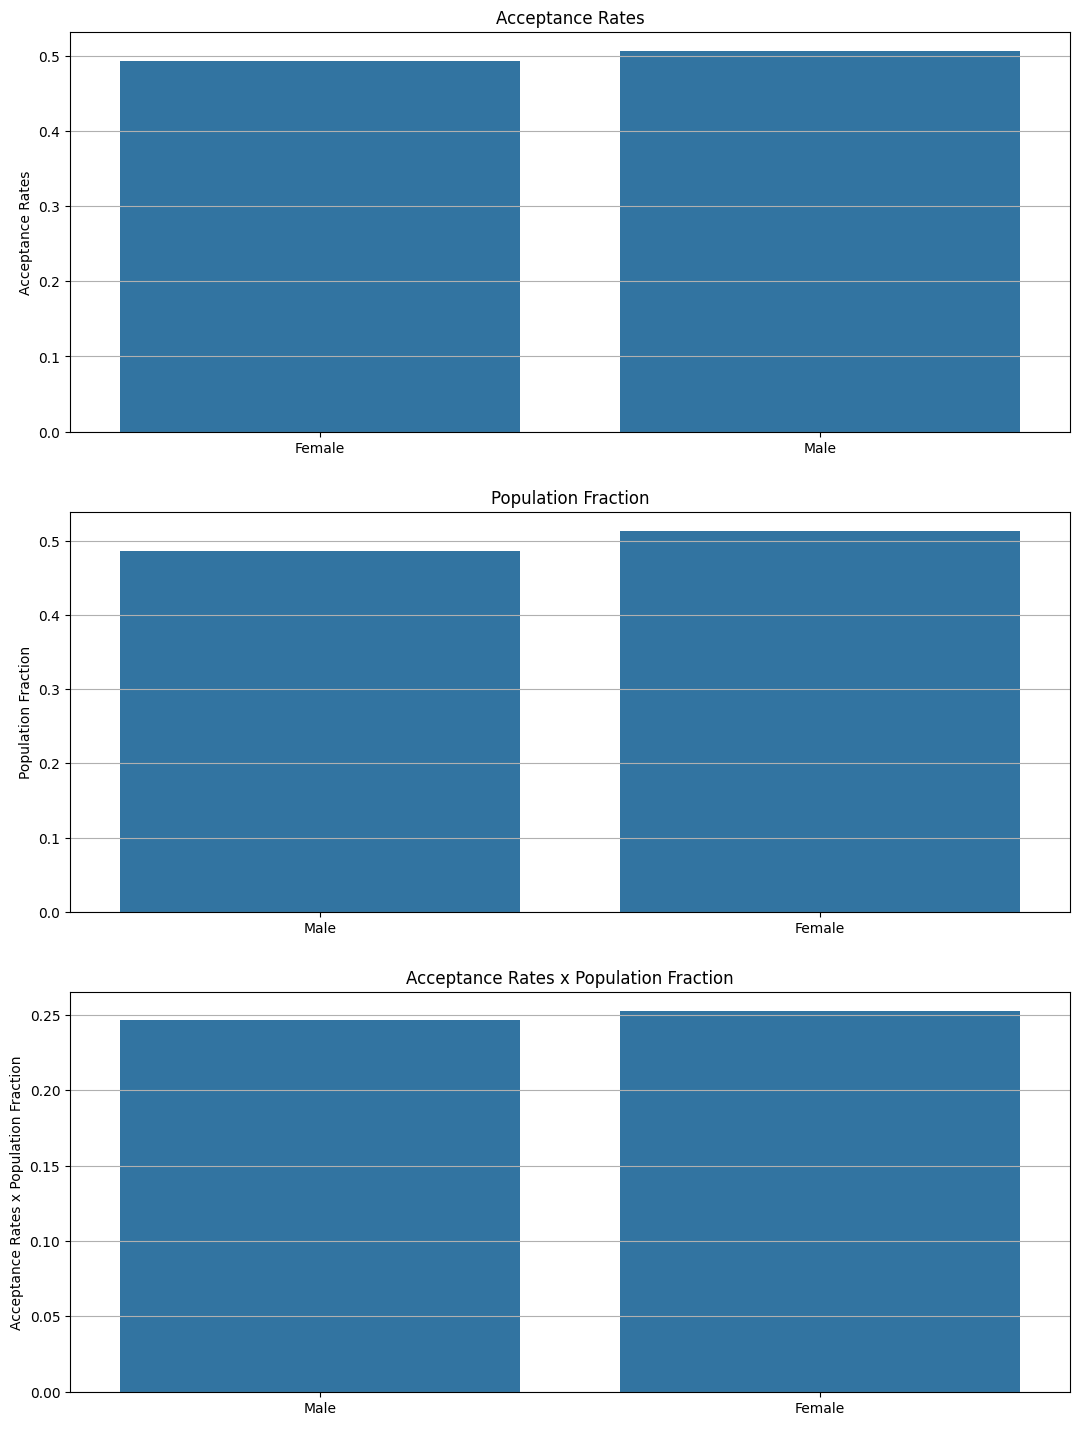






Threshold Catagories: 21, 26, 31, 50plus, 

age


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,50plus,0.4202,0.1364,0.0573
1,36,0.4677,0.1006,0.0471
2,31,0.4767,0.1559,0.0743
3,41,0.5015,0.0813,0.0408
4,46,0.5136,0.0551,0.0283
5,26,0.5148,0.2110,0.1086
6,21,0.5243,0.2210,0.1159
7,below21,0.6968,0.0388,0.0270


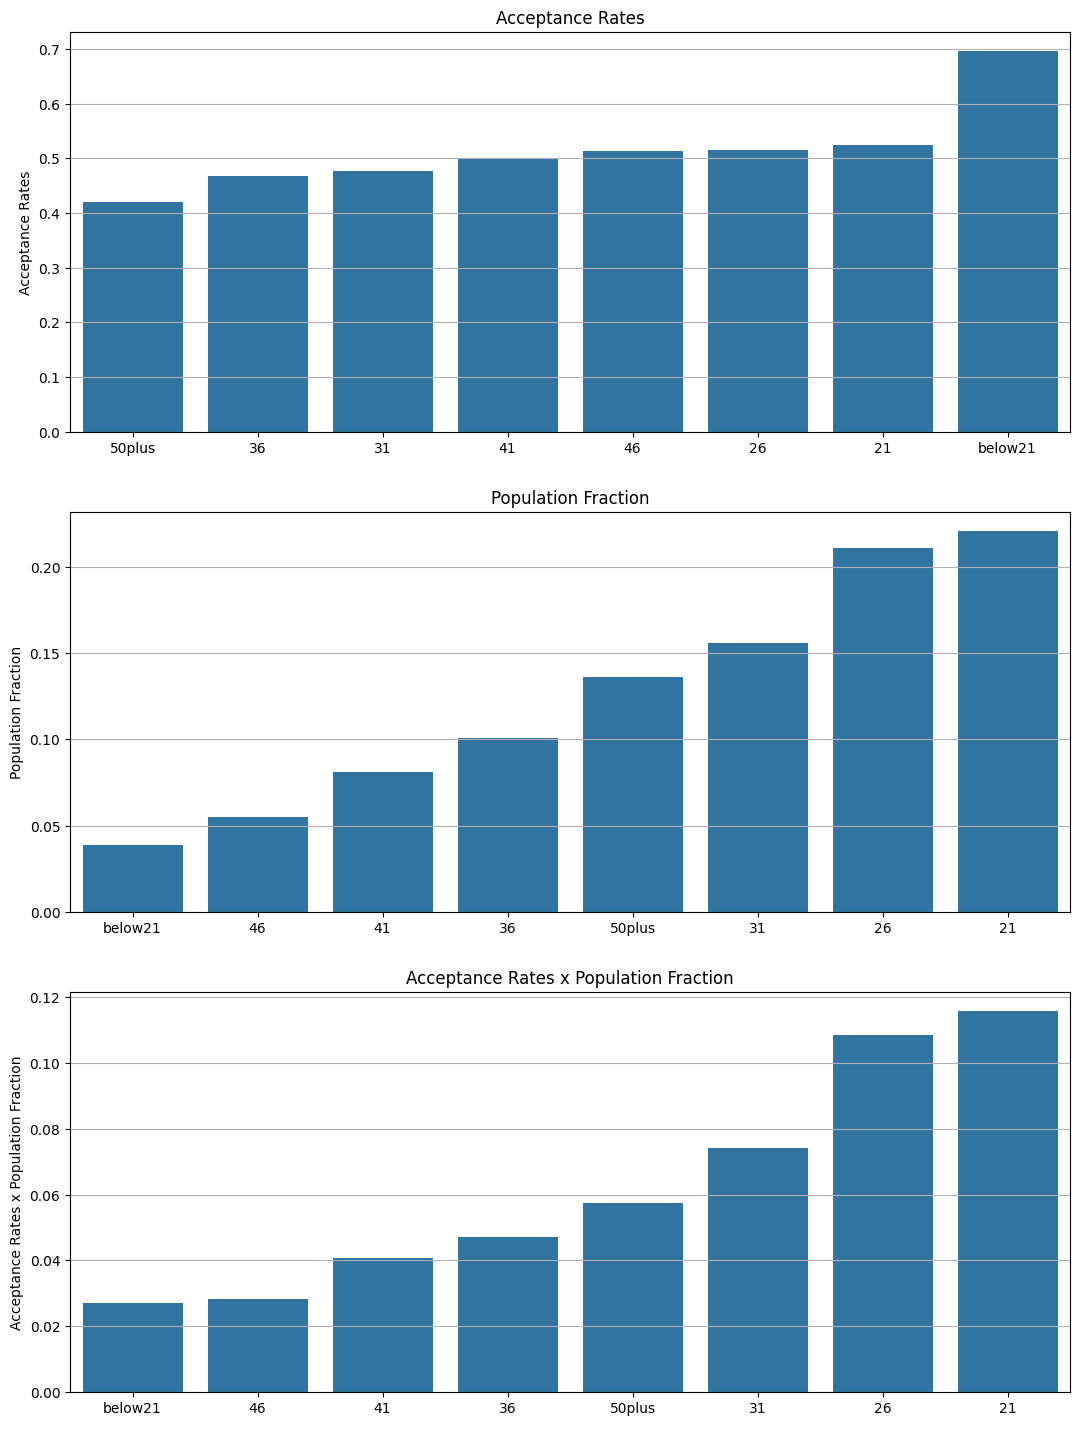






Threshold Catagories: Single, Married partner, 

maritalStatus


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Widowed,0.3514,0.0093,0.0033
1,Unmarried partner,0.4784,0.1794,0.0858
2,Married partner,0.4932,0.3856,0.1902
3,Single,0.5161,0.3879,0.2002
4,Divorced,0.5232,0.0378,0.0198


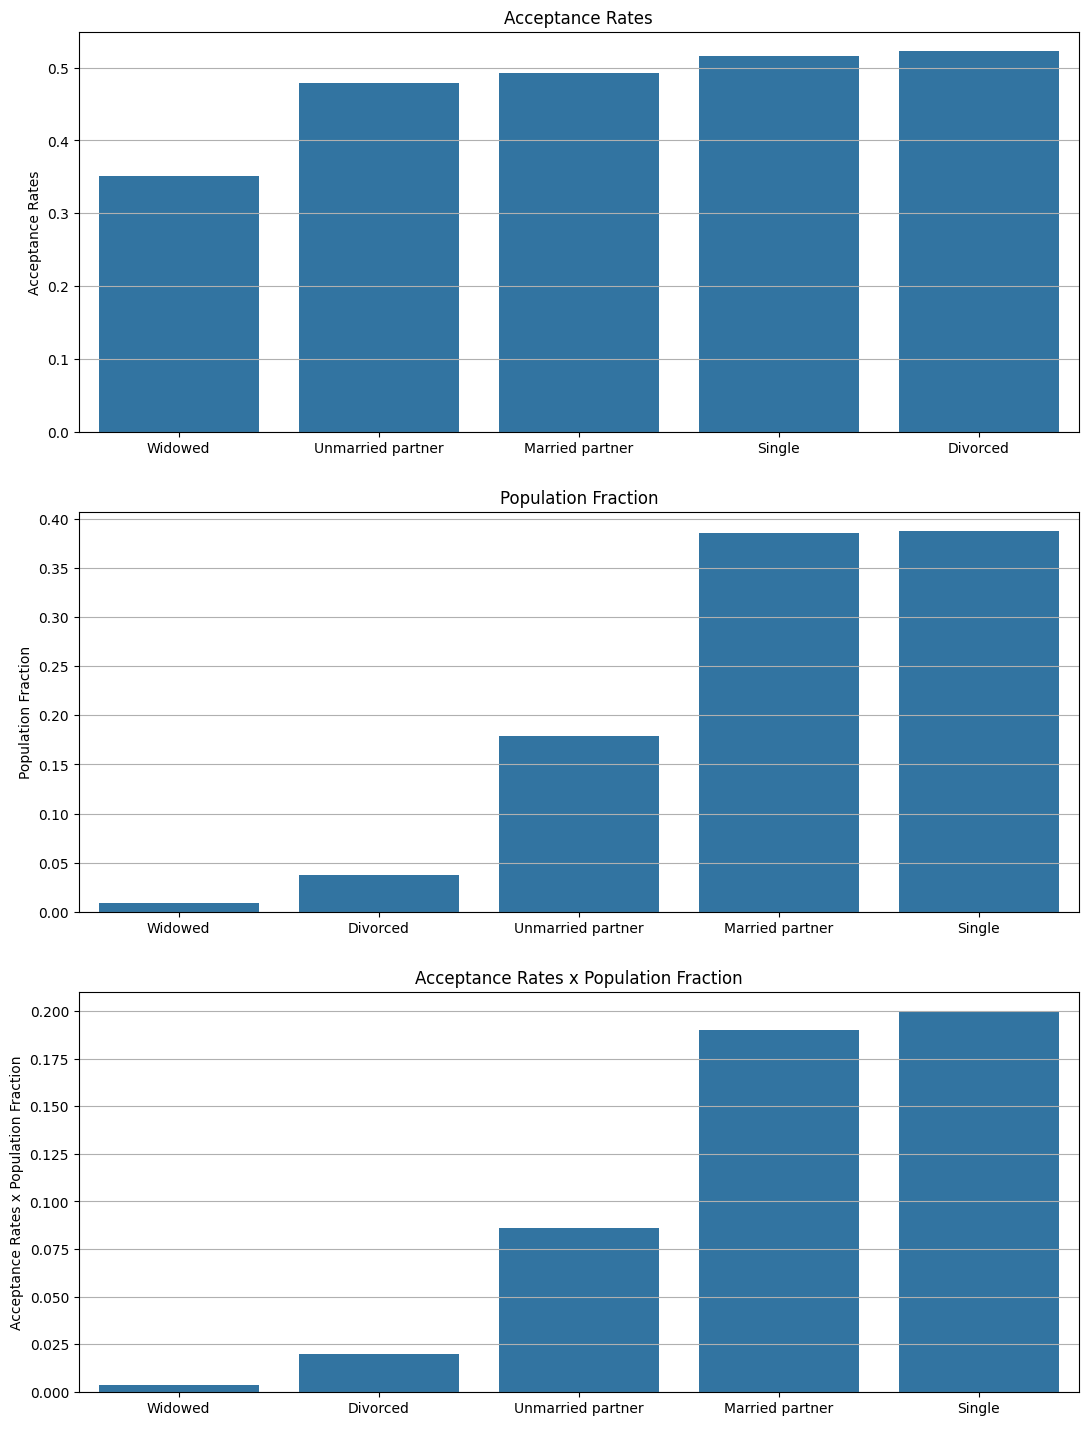






Threshold Catagories: 0, 

has_children


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,1,0.4884,0.3879,0.1895
1,0,0.5061,0.6121,0.3098


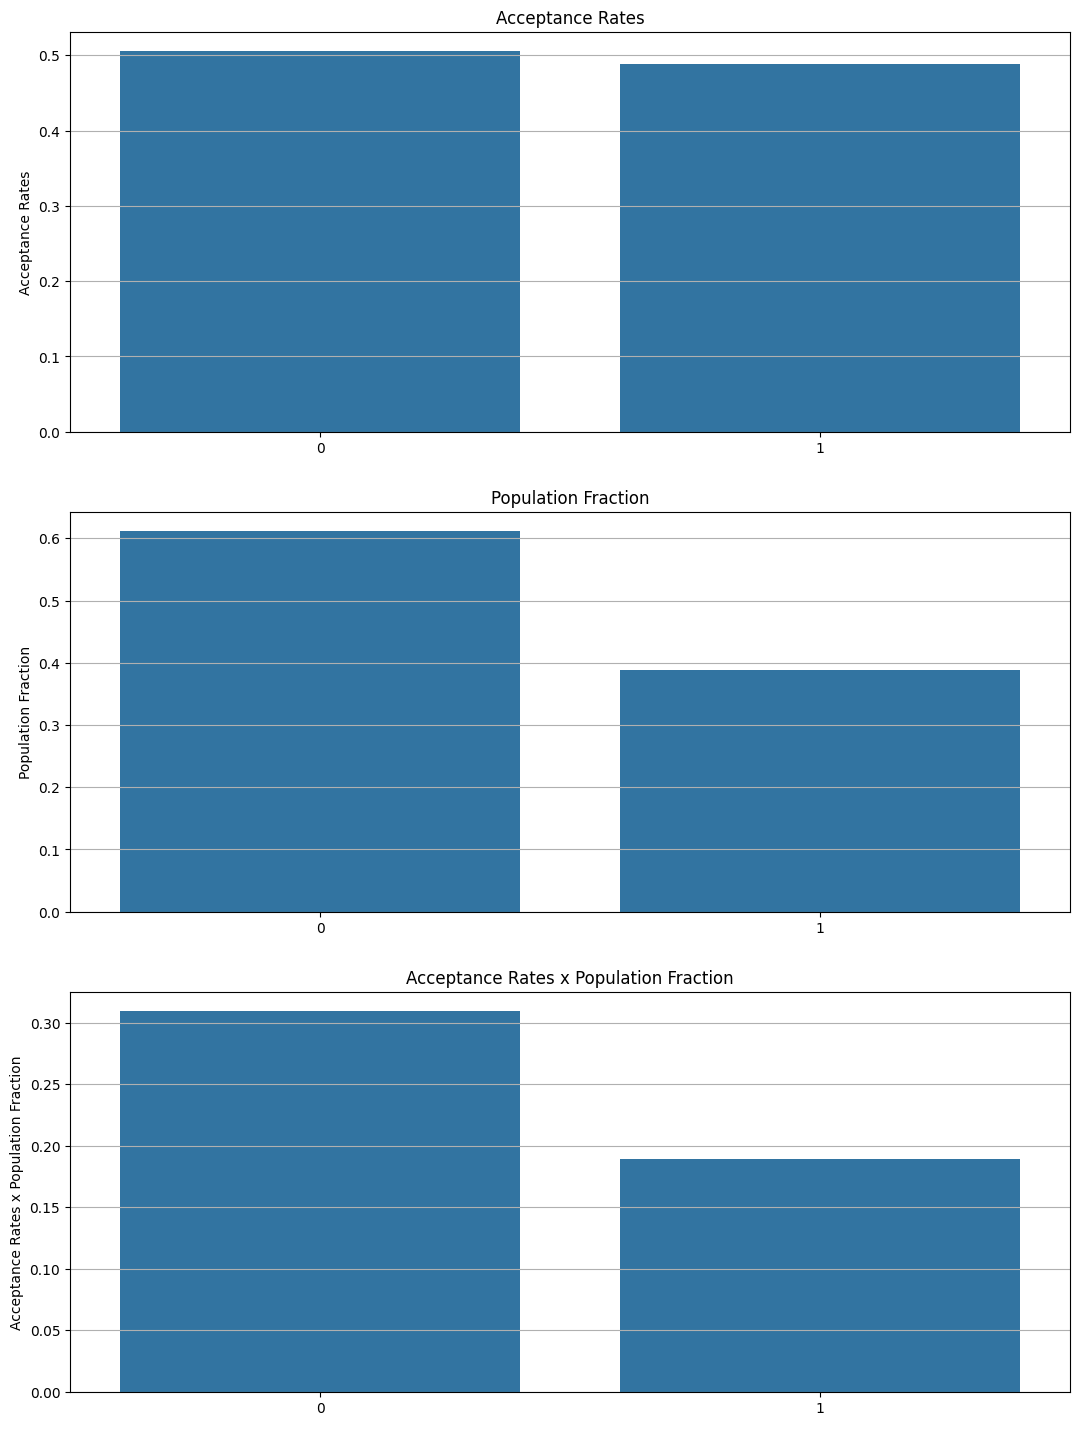






Threshold Catagories: Some college - no degree, Bachelors degree, 

education


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Bachelors degree,0.4628,0.3428,0.1586
1,Graduate degree (Masters or Doctorate),0.5100,0.1496,0.0763
2,Some college - no degree,0.5157,0.3431,0.1769
3,Associates degree,0.5171,0.0876,0.0453
4,High School Graduate,0.5412,0.0698,0.0378
5,Some High School,0.6071,0.0070,0.0042


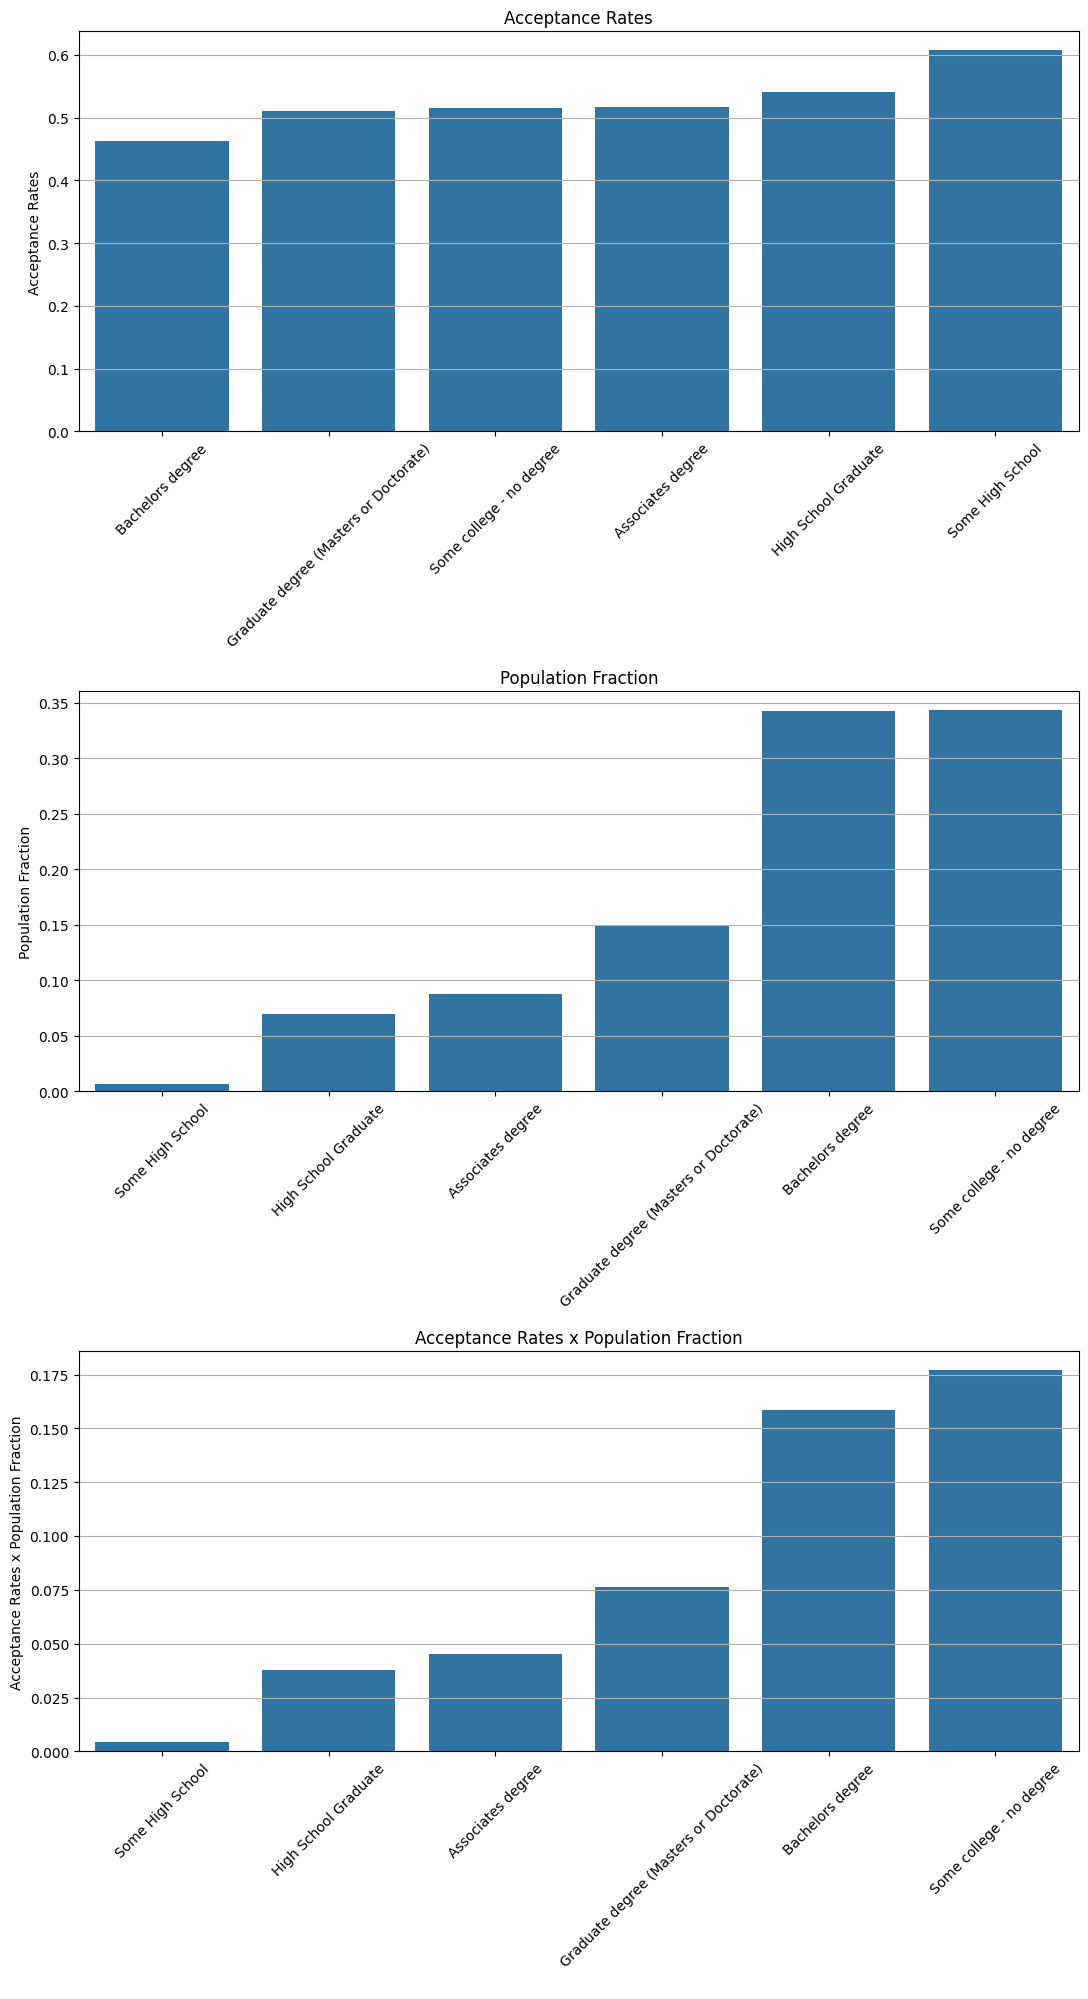






Threshold Catagories: Student, Unemployed, Computer & Mathematical, Sales & Related, Management, Education&Training&Library, 

occupation


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,Community & Social Services,0.3514,0.0185,0.0065
1,Production Occupations,0.3571,0.0070,0.0025
2,Legal,0.3768,0.0173,0.0065
3,Sales & Related,0.3915,0.0888,0.0348
4,Retired,0.4024,0.0410,0.0165
5,Office & Administrative Support,0.4315,0.0493,0.0213
6,Education&Training&Library,0.4358,0.0741,0.0323
7,Food Preparation & Serving Related,0.4458,0.0208,0.0093
8,Protective Service,0.4483,0.0145,0.0065
9,Management,0.4564,0.0746,0.0340


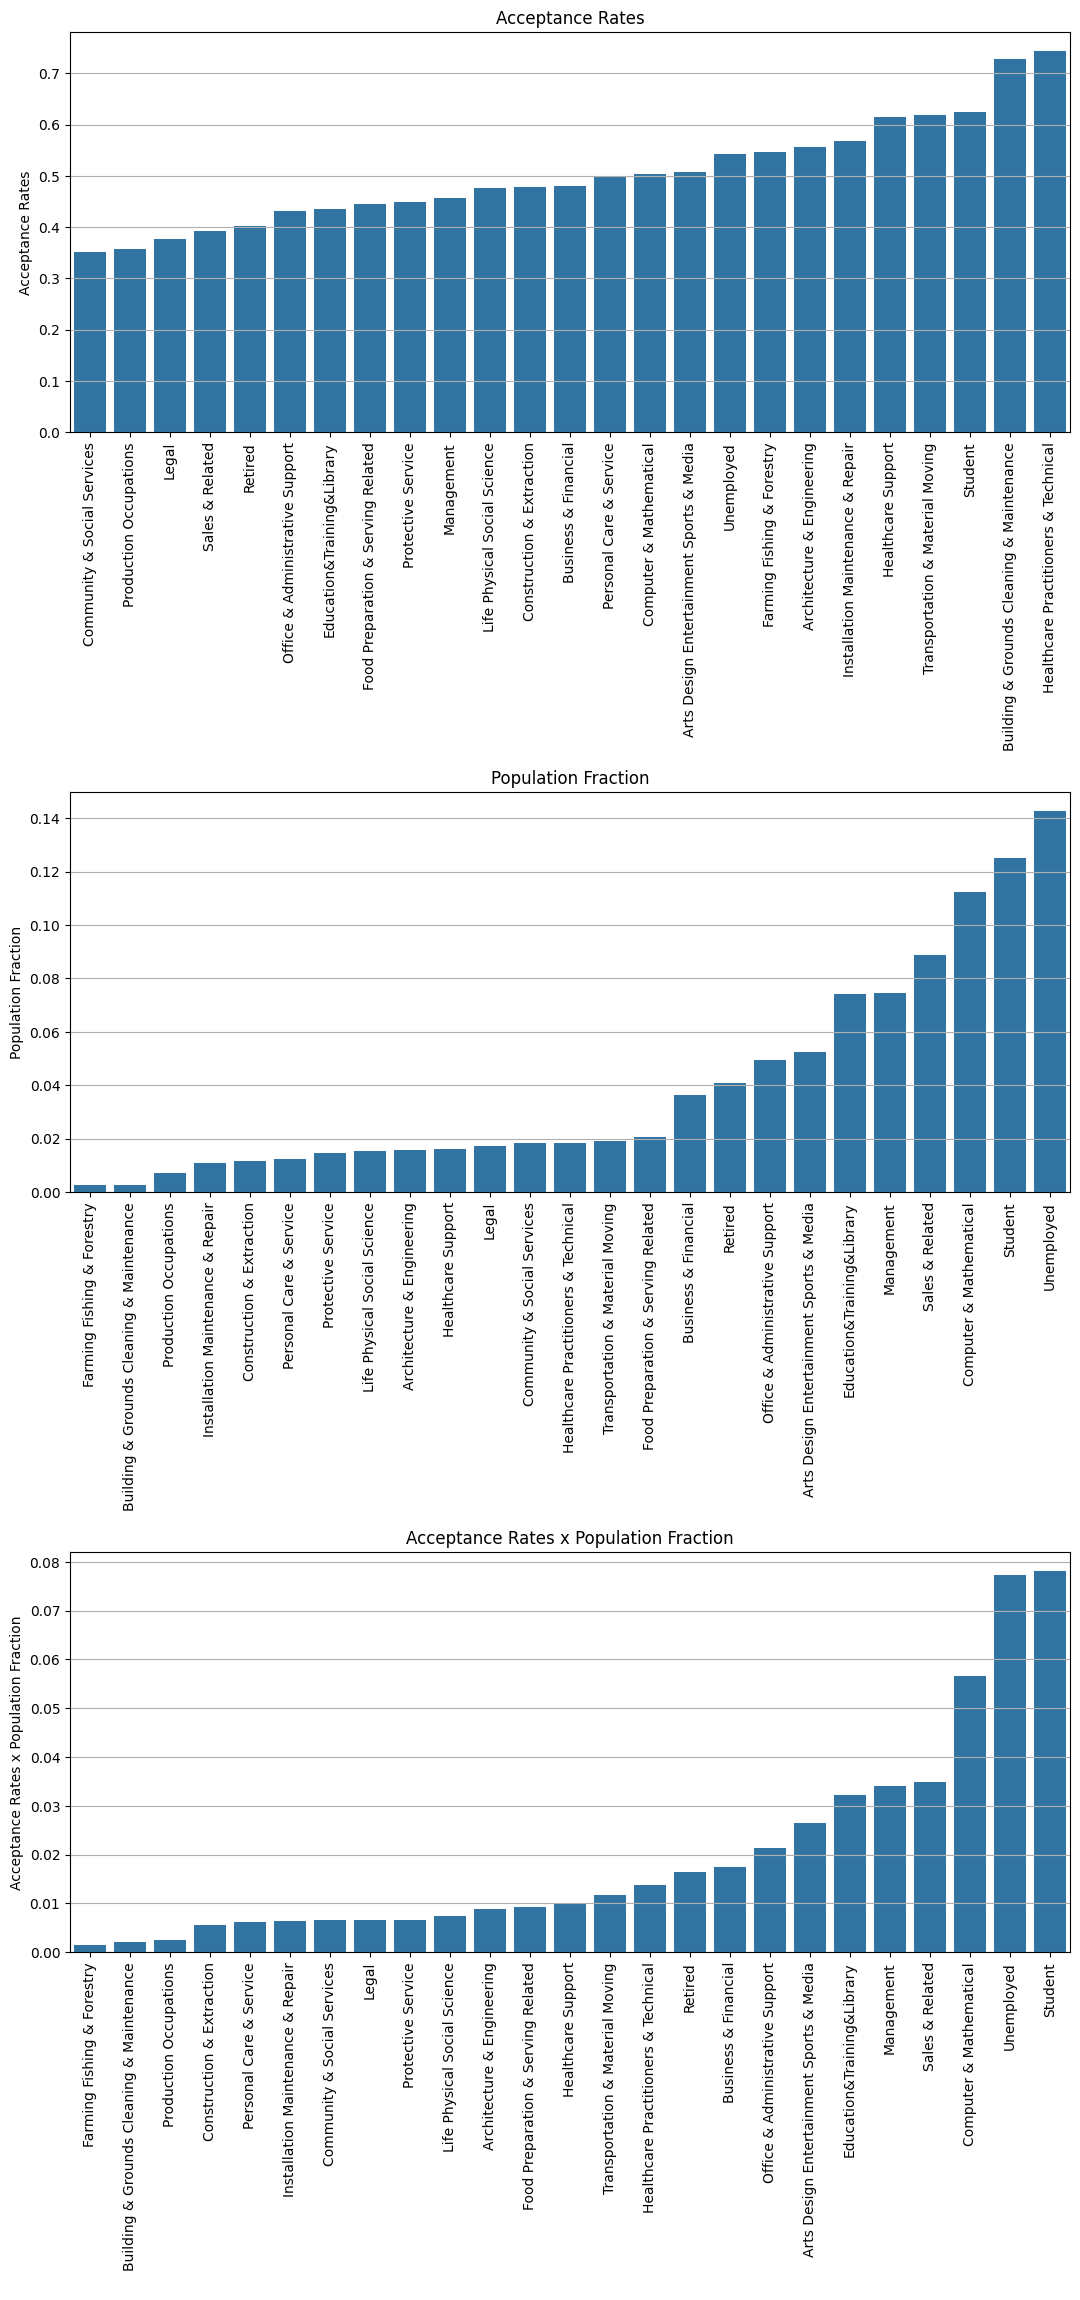






Threshold Catagories: $12500 - $24999, $37500 - $49999, $25000 - $37499, $50000 - $62499, 

income


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,$75000 - $87499,0.2966,0.0591,0.0175
1,$62500 - $74999,0.4364,0.0688,0.0300
2,$25000 - $37499,0.4734,0.1602,0.0758
3,$100000 or More,0.4944,0.1336,0.0661
4,$50000 - $62499,0.5036,0.1371,0.0690
5,$12500 - $24999,0.5404,0.1486,0.0803
6,$37500 - $49999,0.5424,0.1476,0.0801
7,Less than $12500,0.5519,0.0771,0.0426
8,$87500 - $99999,0.5572,0.0678,0.0378


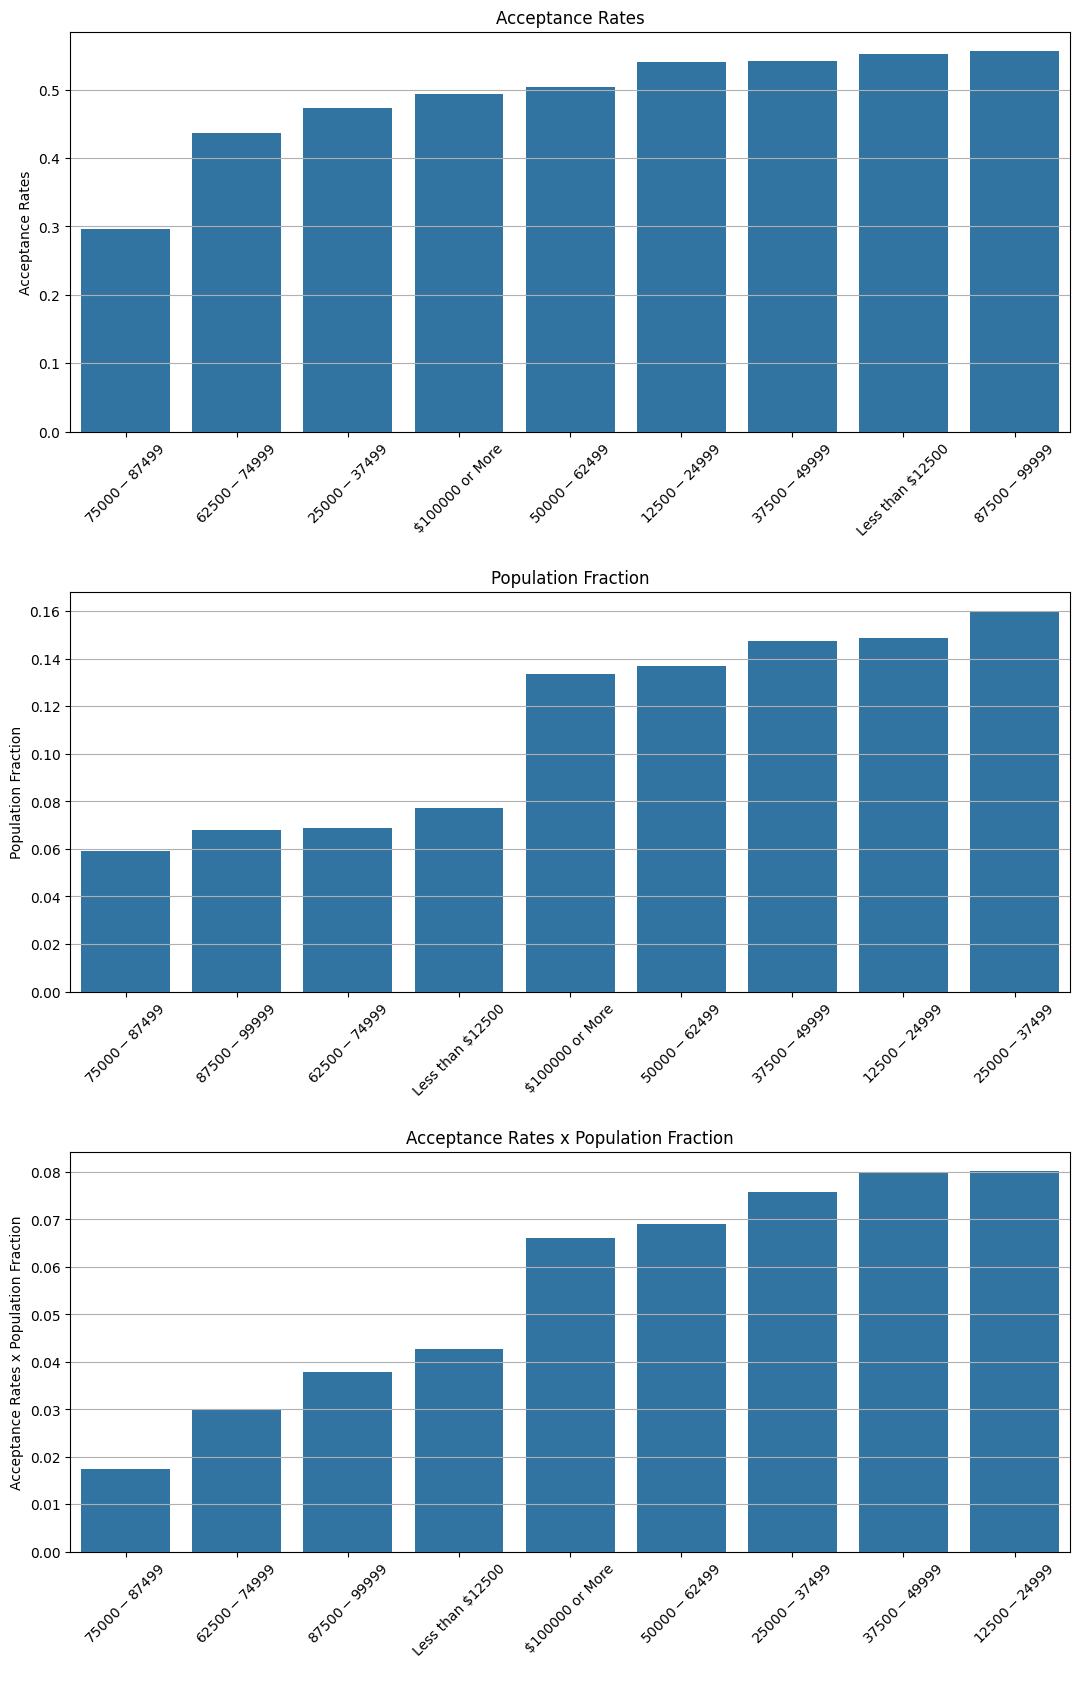






Threshold Catagories: never, less1, 

Bar


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,gt8,0.4513,0.0283,0.0128
1,never,0.4902,0.4094,0.2007
2,1~3,0.4987,0.1907,0.0951
3,less1,0.5065,0.2698,0.1367
4,4~8,0.5243,0.0926,0.0486
5,unknown,0.5946,0.0093,0.0055


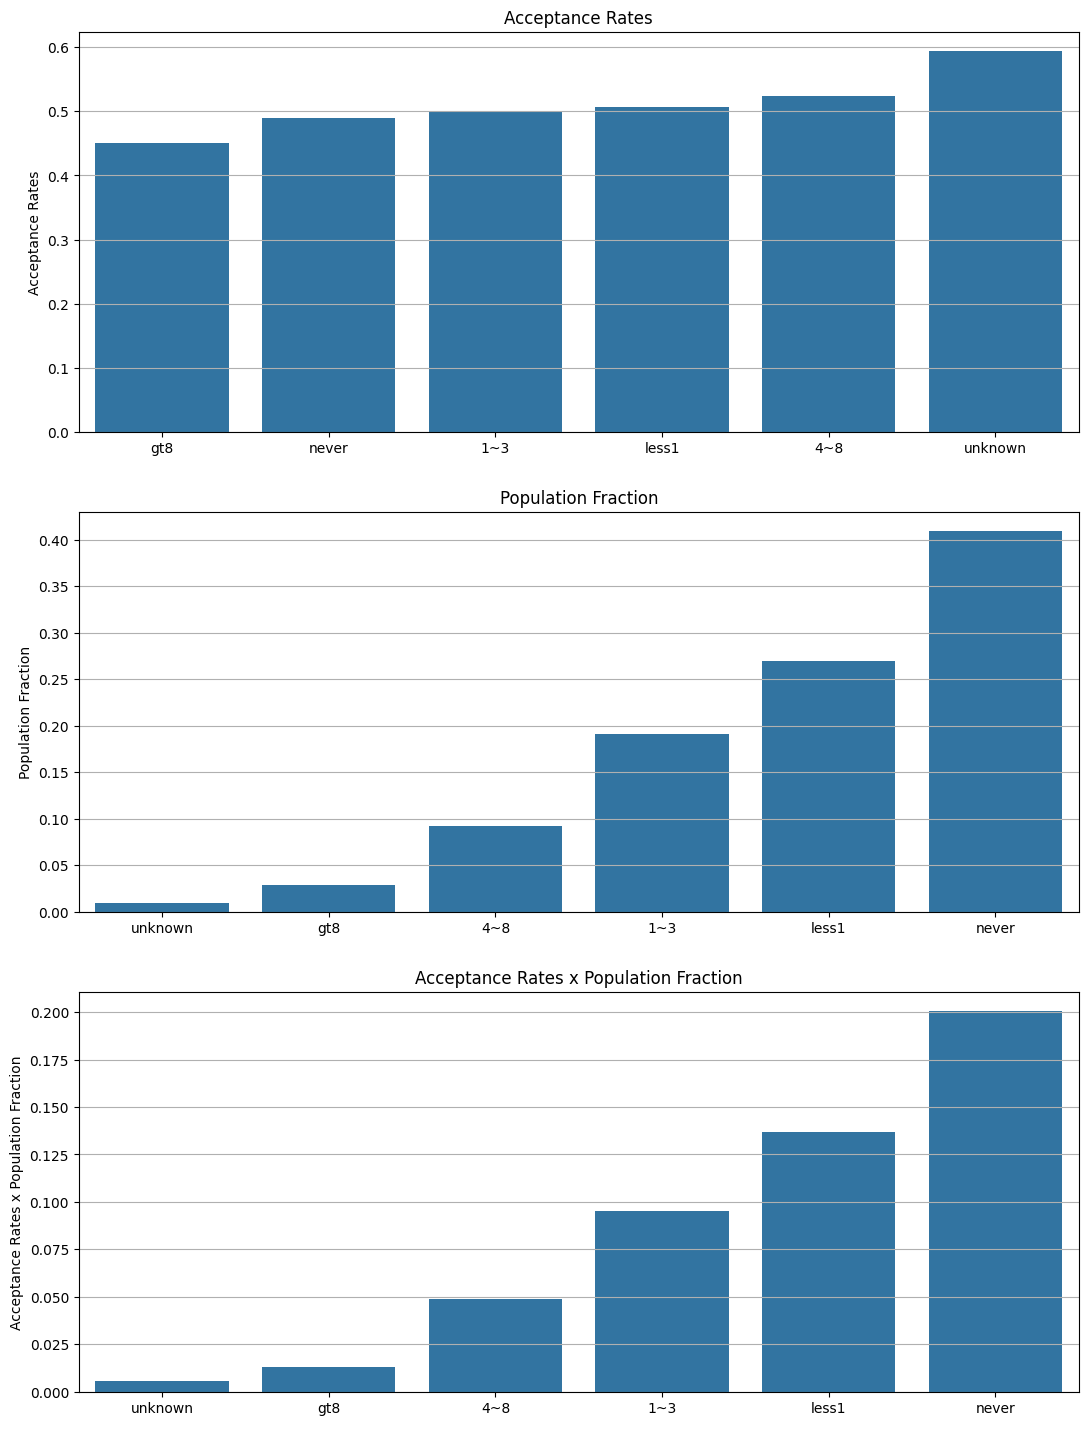






Threshold Catagories: 1~3, less1, 4~8, 

CoffeeHouse


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,never,0.1888,0.2320,0.0438
1,unknown,0.4583,0.0180,0.0082
2,less1,0.4819,0.2690,0.1296
3,1~3,0.6478,0.2608,0.1689
4,gt8,0.6579,0.0856,0.0563
5,4~8,0.6859,0.1346,0.0923


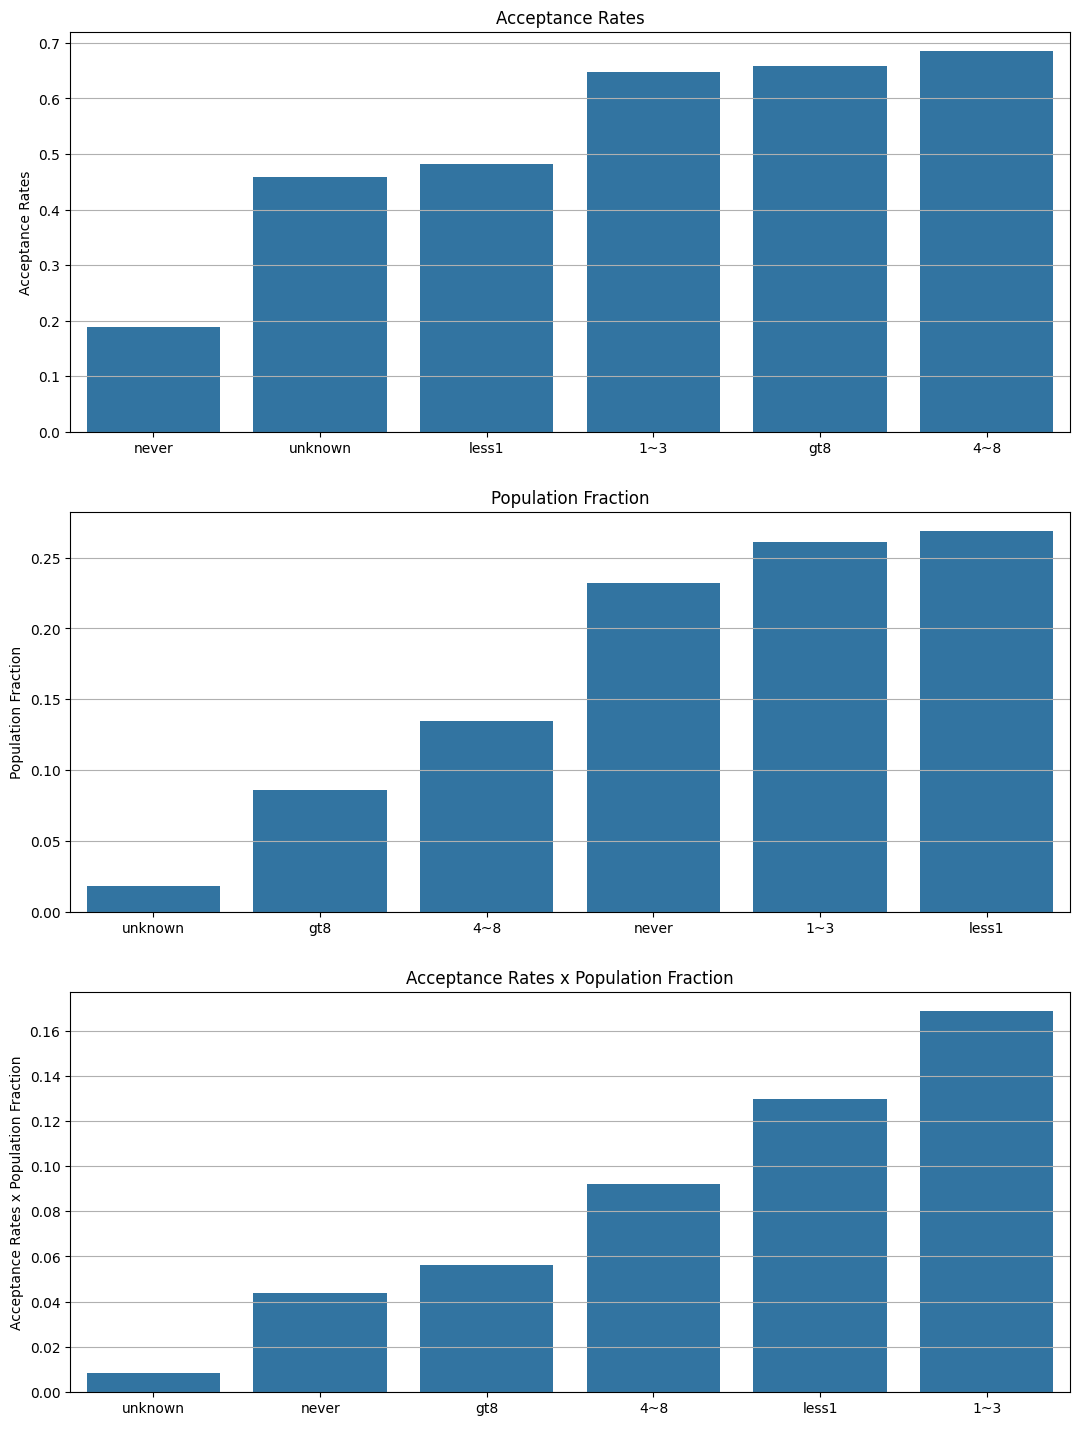






Threshold Catagories: 1~3, 4~8, 

CarryAway


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,less1,0.4233,0.1436,0.0608
1,never,0.4651,0.0108,0.0050
2,gt8,0.5052,0.1214,0.0613
3,4~8,0.5108,0.3356,0.1714
4,1~3,0.5134,0.3744,0.1922
5,unknown,0.5965,0.0143,0.0085


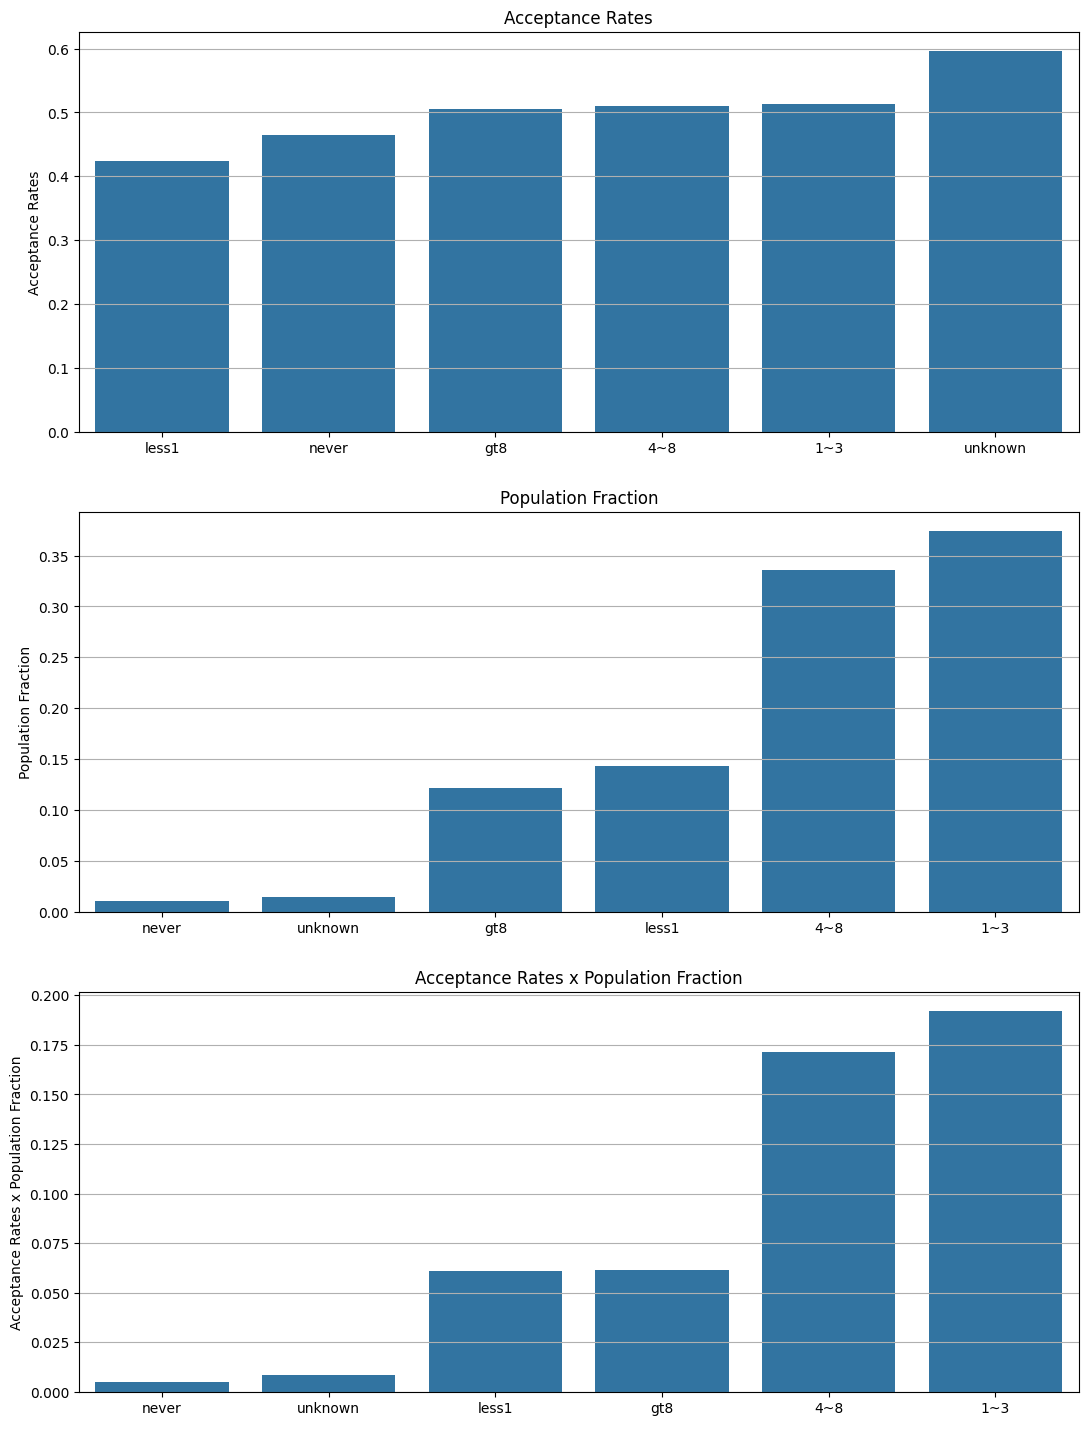






Threshold Catagories: 1~3, 4~8, 

RestaurantLessThan20


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,never,0.4231,0.0130,0.0055
1,less1,0.4499,0.1624,0.0731
2,1~3,0.5009,0.4202,0.2105
3,4~8,0.5137,0.2840,0.1459
4,gt8,0.5220,0.1079,0.0563
5,unknown,0.6400,0.0125,0.0080


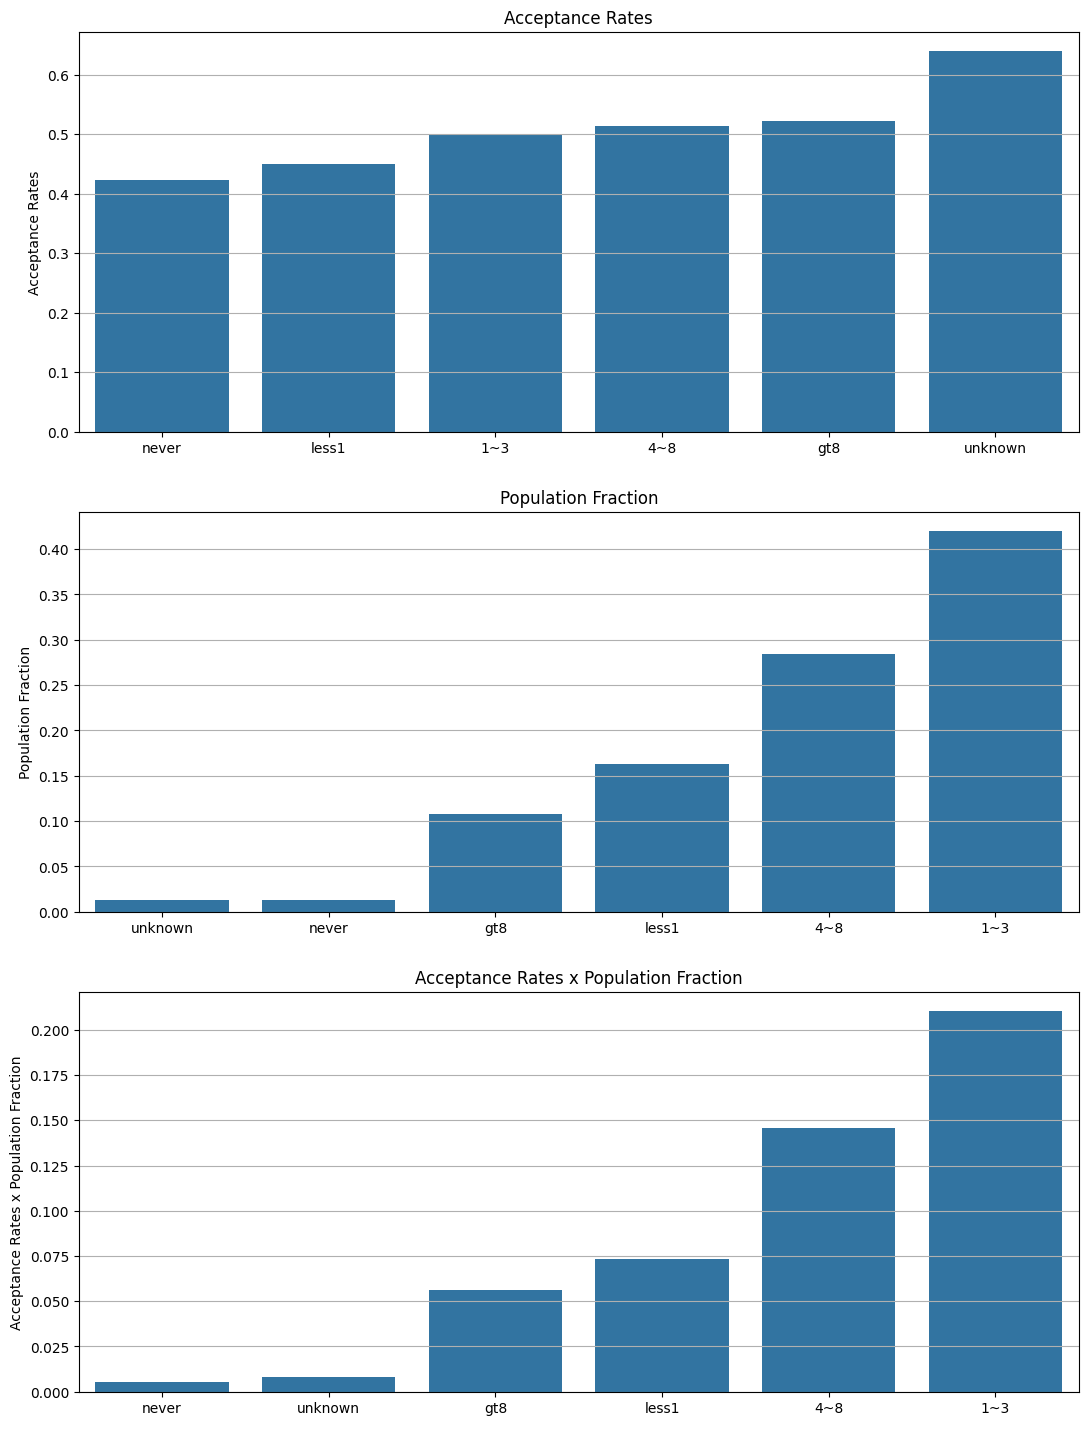






Threshold Catagories: less1, 1~3, 

Restaurant20To50


,Category,Acceptance Rates,Population Fraction,Acceptance Rates x Population Fraction
0,never,0.4321,0.1807,0.0781
1,less1,0.5008,0.4677,0.2342
2,unknown,0.5091,0.0138,0.0070
3,1~3,0.5164,0.2665,0.1376
4,4~8,0.5722,0.0485,0.0278
5,gt8,0.6374,0.0228,0.0145


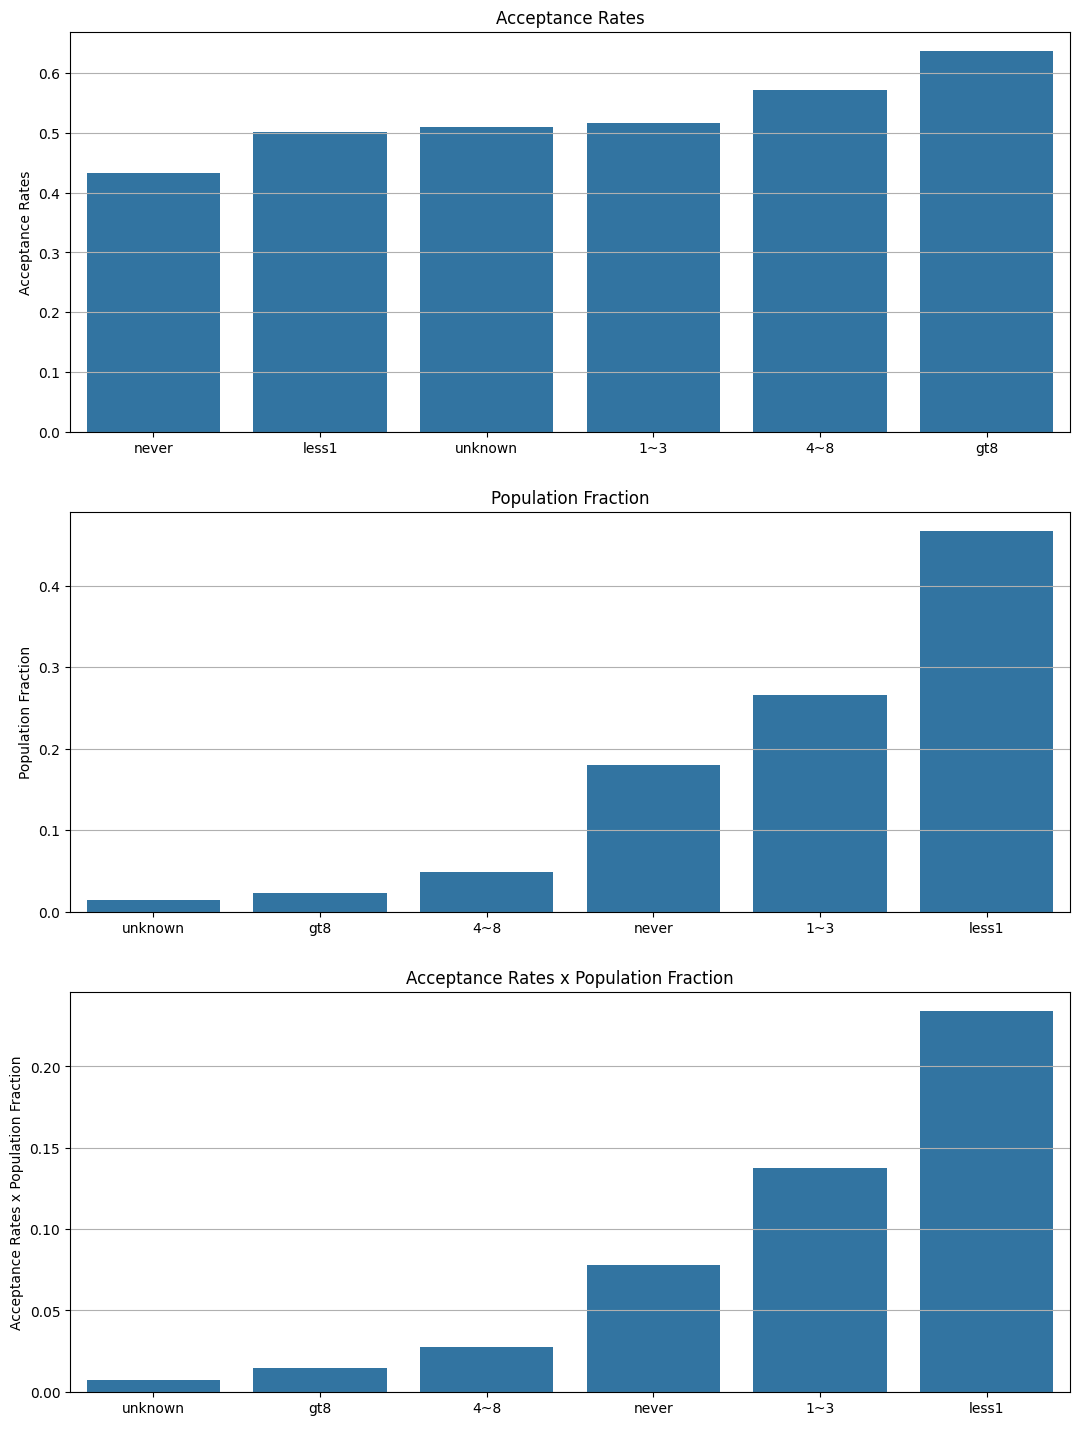

In [20]:
##----------------------------------------------------------------------------------------------------##
## Run dataframe_acceptance_rates on coffee_df:                                                       ##
##----------------------------------------------------------------------------------------------------##

dataframe_acceptance_rates(coffee_df)